# Sistema de Reconocimiento de Generos Musicales

Importar librerias para el desarrollo del proyecto:

In [ ]:
import sys, os, errno, csv, soundfile as sf, numpy as np, scipy.signal as signal, pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter, freqz
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

definir filtro pasa bajas (Etapa de Demodulacion):

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
genero=['electro','rap','rock','salsa']
fs=44100
[ti,tf]=[40,45]
t=np.arange(ti,tf,1/fs)

## Modulacion 

Modulacion por Doble ancho de Banda con portadora suprimida __DSB-SC__:

<audio src="base_de_datos/electro/archivos_wav/Track_15.wav" controls>Your browser does not support the audio element.</audio>
[](--)

Crear Carpeta "Modulacion" dentro de la cual se organizaran los archivos correspondientes

In [ ]:
try:
    os.mkdir('Database/Modulacion')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

Se crea un nuevo archivo de audio correspondiente 5 segundos de la cancion original

In [ ]:
Track='Track_15.wav'
xdat,a=sf.read('Database/'+genero[3]+'/wavfiles/' + Track)
xnew=xdat[int(ti*fs):int(tf*fs),:]
direct='Database/Modulacion/'
name_out = 'Track_Original.wav'
sf.write(direct + name_out, xnew, fs)
print('Archivo creado\n')

Archivo creado



<audio src="base_de_datos/Modulacion/Track_Original.wav" controls>Your browser does not support the audio element.</audio>
[](--)

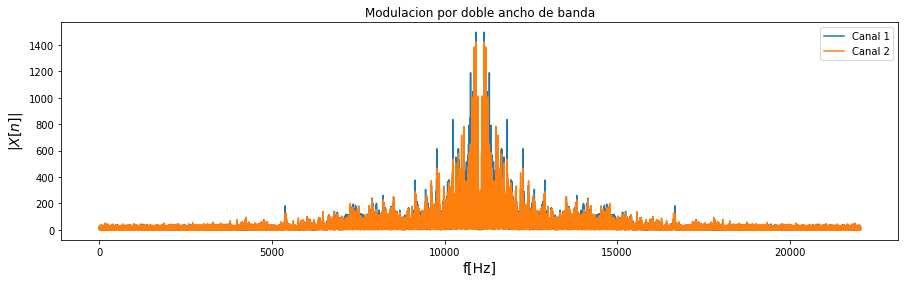

In [ ]:
fp=fs/4
wp=2*np.pi*fp

xmi = xnew[:,0]
xmd = xnew[:,1]

xdsbsci=xmi*np.cos(wp*t)
xdsbscd=xmd*np.cos(wp*t)

xdsbsc=np.zeros([len(xdsbsci),2])
xdsbsc[:,0]=xdsbsci
xdsbsc[:,1]=xdsbscd

Xdsbscw=np.fft.rfft(xdsbsc, axis=0)
f=np.fft.rfftfreq(np.size(xdsbsc, axis=0), 1/fs)
plt.figure(figsize=[15,4])
plt.plot(f,abs(Xdsbscw))
plt.title('Modulacion por doble ancho de banda')
plt.legend(('Canal 1', 'Canal 2'))
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

## Demodulacion

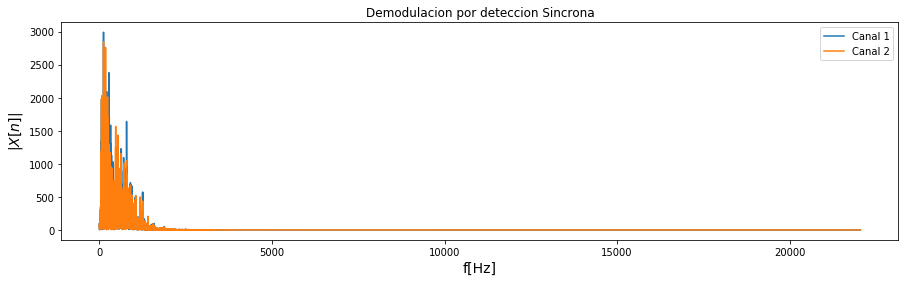

In [ ]:
xreci= xdsbsc[:,0]
xrecd = xdsbsc[:,1]

ddsbi=butter_lowpass_filter(xreci*np.cos(wp*t), fp/10, fs)
ddsbd=butter_lowpass_filter(xrecd*np.cos(wp*t), fp/10, fs)

ddsb=np.zeros([len(ddsbi),2])
ddsb[:,0]=2*ddsbi
ddsb[:,1]=2*ddsbd

Ddsbw=np.fft.rfft(ddsb, axis=0)
f=np.fft.rfftfreq(np.size(ddsb, axis=0), 1/fs)
plt.figure(figsize=[15,4])
plt.plot(f,abs(Ddsbw))
plt.title('Demodulacion por deteccion Sincrona')
plt.legend(('Canal 1', 'Canal 2'))
plt.xlabel(r'f[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()

Exportar archivo modulado

In [ ]:
name_out_mod = 'Track_Modulado.wav'
sf.write(direct + name_out_mod, ddsb, fs)
print('Archivo Creado\n')

Archivo Creado



<audio src="base_de_datos/Modulacion/Track_Modulado.wav" controls>Your browser does not support the audio element.</audio>
[](--)

## Base de Datos

* Crear la subcarpeta "archivos_wav" dentro de los generos: 
* Convertir archivos .mp3 a .wav:

In [ ]:
for i in range(0,len(genero),1):
    try:
        os.mkdir('Database/' + genero[i] + '/wavfiles')
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise
    for j in range(40):
        try:
            nombre_in = 'Database/' + genero[i] + '/Track_' + str(j+1) + '.mp3'
            nombre_out = 'Database/' + genero[i] + '/wavfiles/Track_' + str(j+1) + '.wav'
            command_wav="ffmpeg -i " + nombre_in +" "+ nombre_out
            os.system(command_wav)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

## 1. ELECTRONICA

<audio src="base_de_datos/electro/archivos_wav/Track_15.wav" controls>Your browser does not support the audio element.</audio>
[](--)

In [ ]:
xelectro=np.zeros([220500,2,40],order='C')
for i in range (40):
    x,a=sf.read('Database/' + genero[0] + '/wavfiles/Track_' + str(i+1) + '.wav')
    xdat=x[int(ti*fs):int(tf*fs),:]
    xelectro[:,:,i]=xdat
    
print('Numero de Datos: %i \n Canales: %i \n Numero de Canciones: %i'
      % (np.size(xelectro, axis=0), np.size(xelectro, axis=1), np.size(xelectro, axis=2)))

Numero de Datos: 220500 
 Canales: 2 
 Numero de Canciones: 40


In [ ]:
Xelectrow=np.fft.rfft(xelectro,axis=0)
f=np.fft.rfftfreq(1*np.size(xelectro,axis=0),1/fs)

G:\Nueva carpeta\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


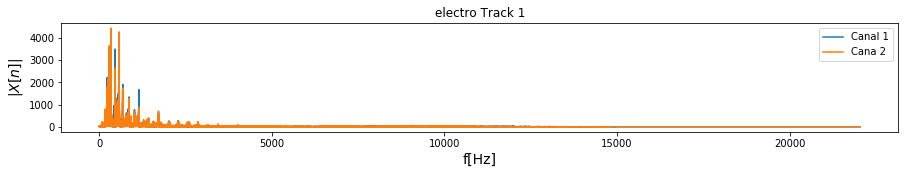

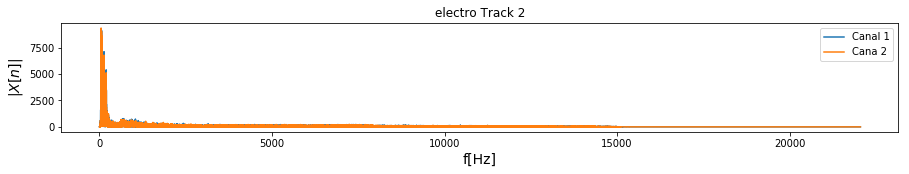

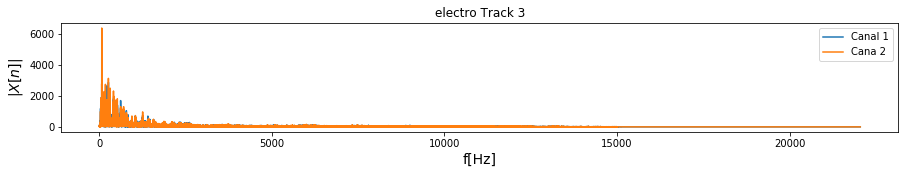

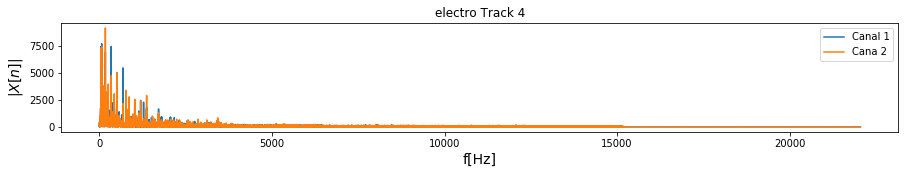

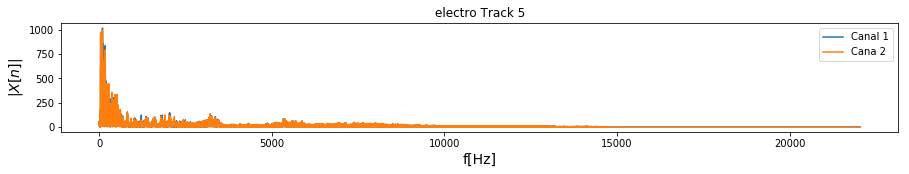

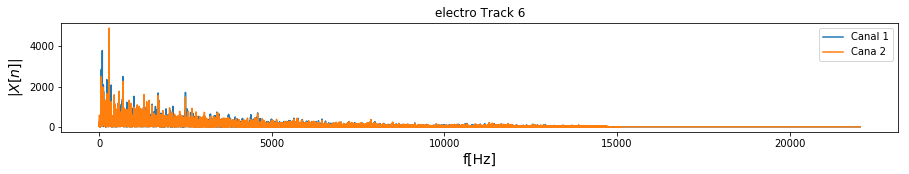

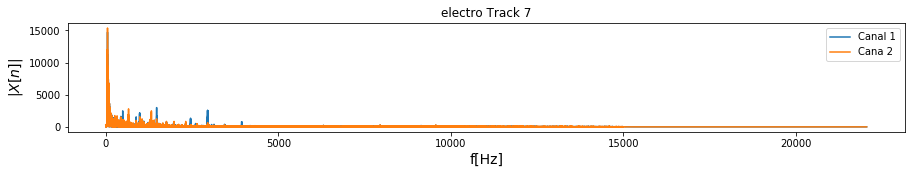

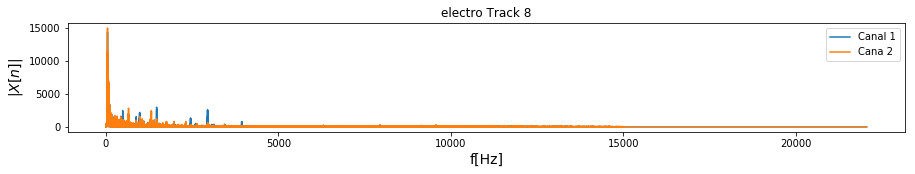

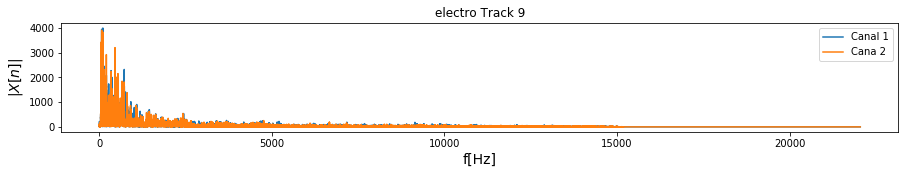

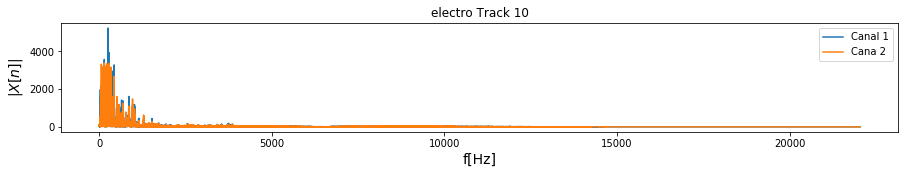

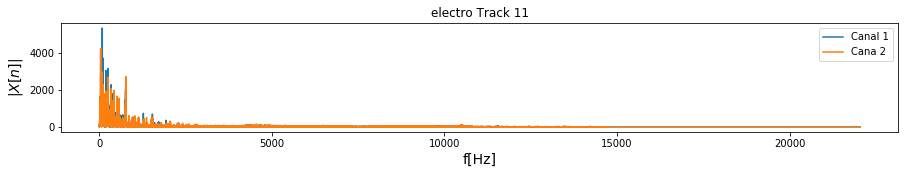

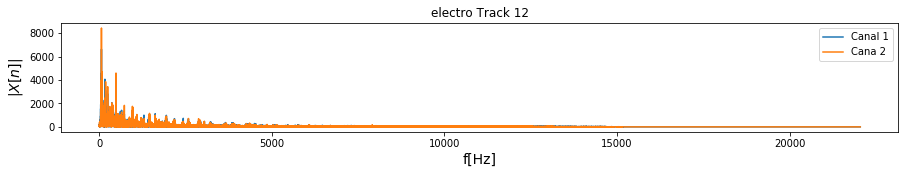

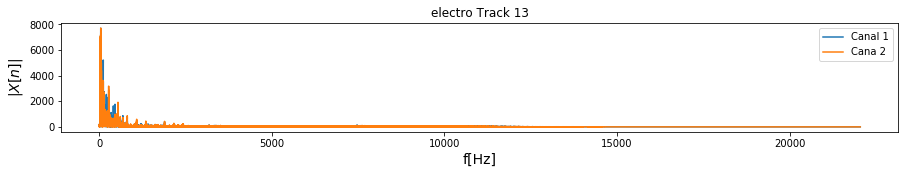

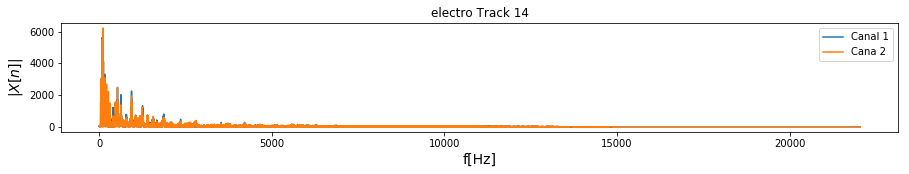

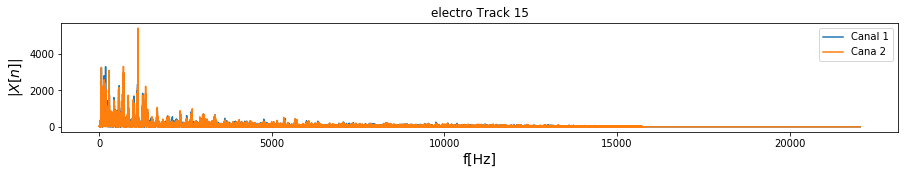

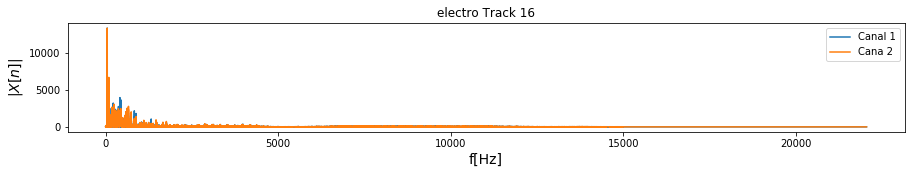

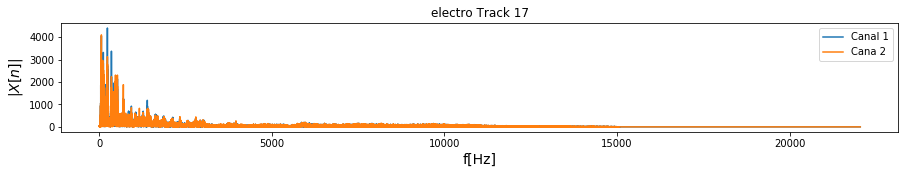

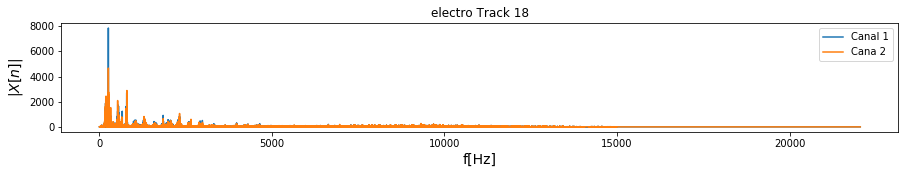

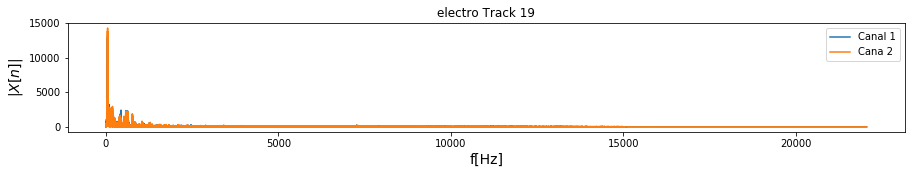

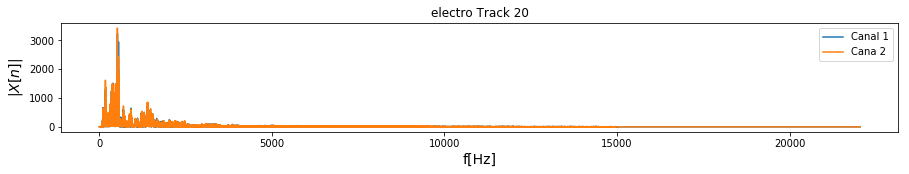

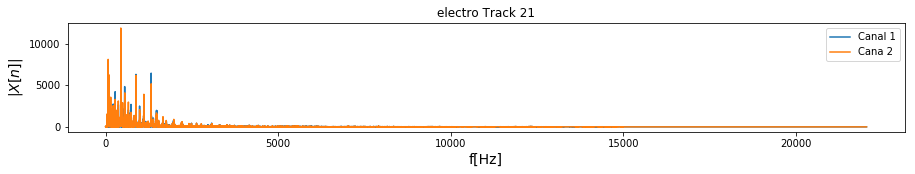

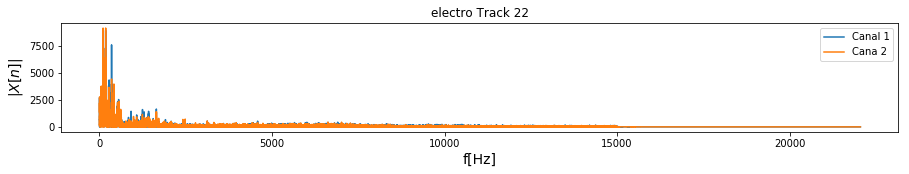

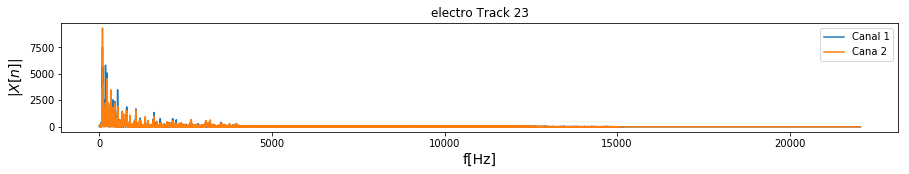

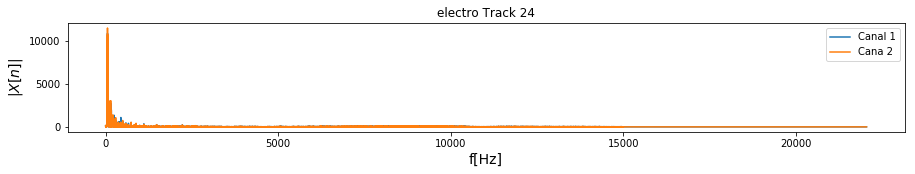

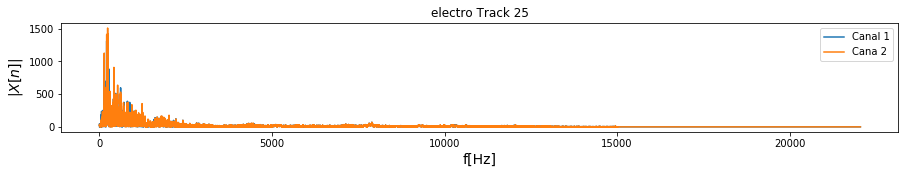

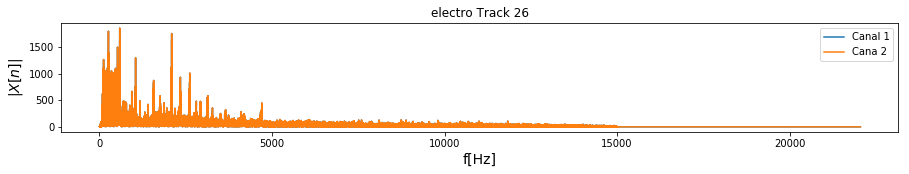

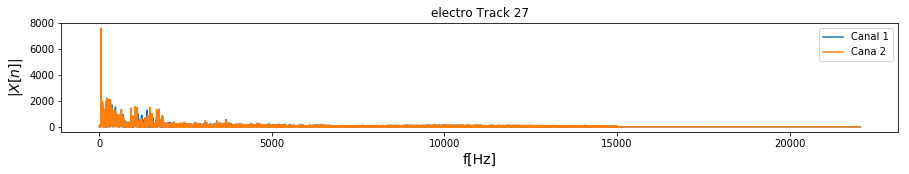

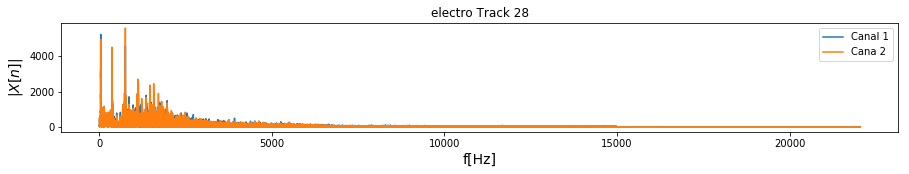

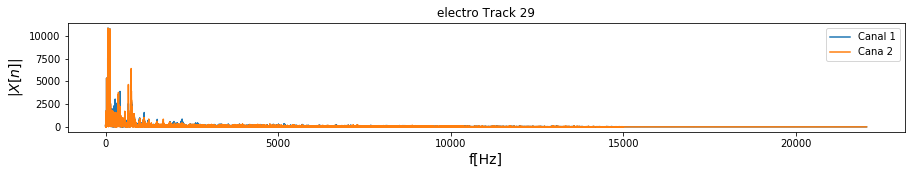

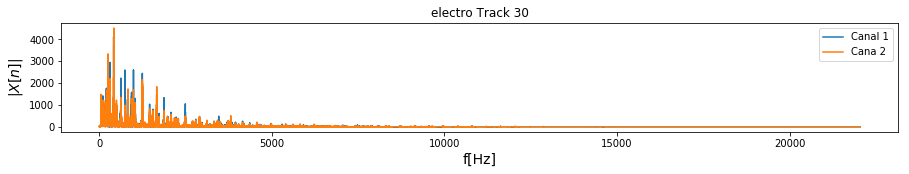

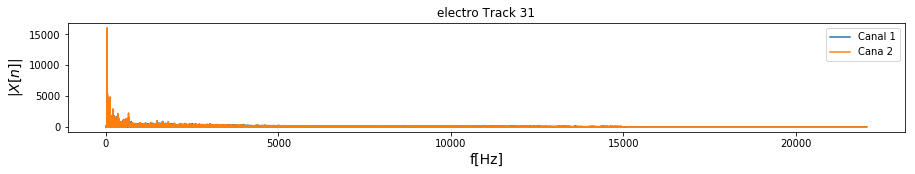

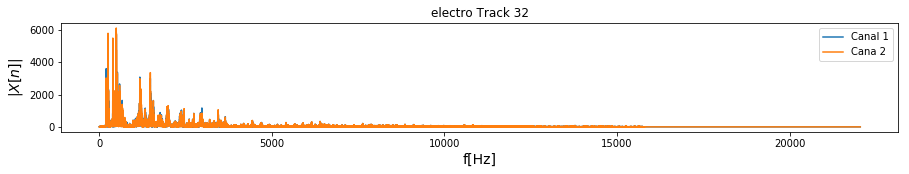

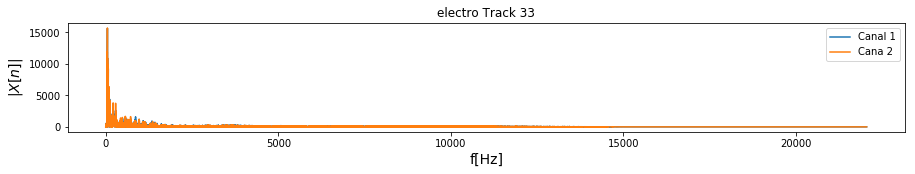

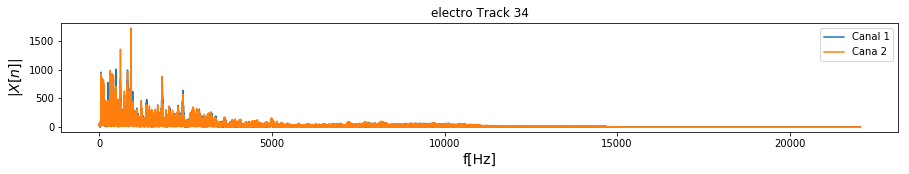

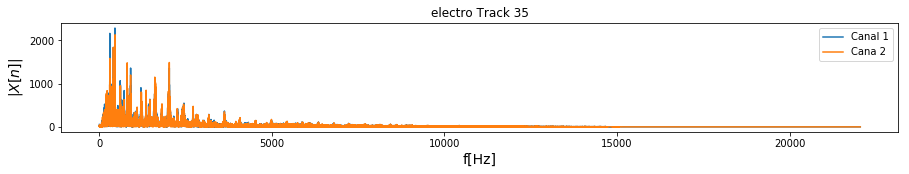

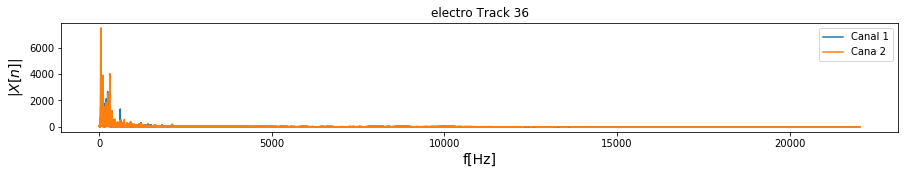

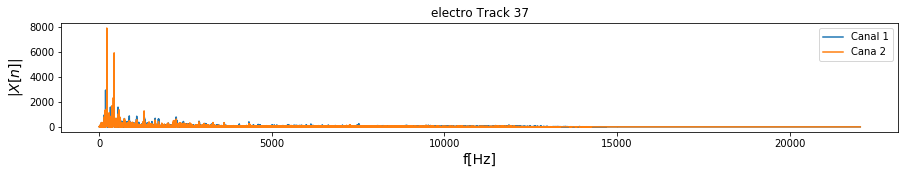

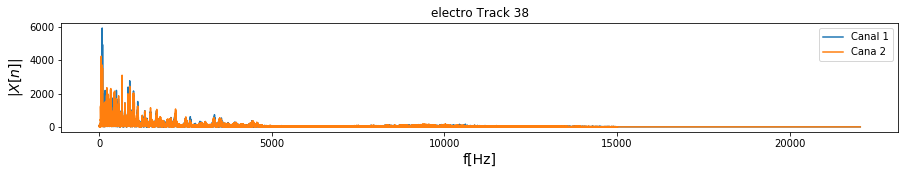

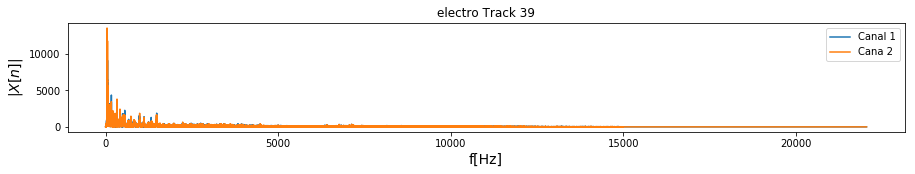

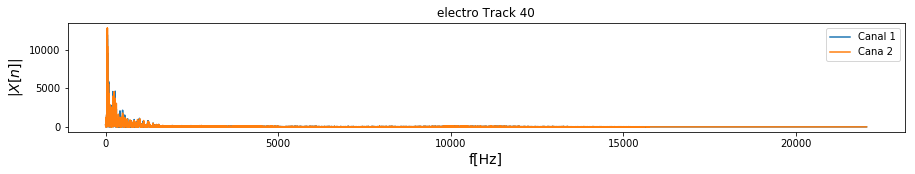

In [ ]:
for i in range (np.size(Xelectrow, axis=2)):
    Xplotw=Xelectrow[:,:,i]
    plt.figure(figsize=[15,2])
    plt.plot(f,abs(Xplotw))
    plt.title(genero[0] + ' Track ' + str(i+1))
    plt.legend(('Canal 1','Cana 2'))
    plt.xlabel(r'f[Hz]',fontsize = 14)
    plt.ylabel(r'$|X[n]|$',fontsize = 14)

plt.show()

## 2. RAP

<audio src="base_de_datos/rap/Track_25.mp3" controls>Your browser does not support the audio element.</audio>
[](--)

In [ ]:
xrap=np.zeros([220500,2,40],order='C')

for i in range (40):
    x,a=sf.read('Database/' + genero[1] + '/wavfiles/Track_' + str(i+1) + '.wav')
    xdat=x[int(ti*fs):int(tf*fs),:]
    xrap[:,:,i]=xdat
    
print('Numero de Datos: %i \n Canales: %i \n Numero de Canciones: %i'
      % (np.size(xrap, axis=0), np.size(xrap, axis=1), np.size(xrap, axis=2)))

Numero de Datos: 220500 
 Canales: 2 
 Numero de Canciones: 40


In [ ]:
Xrapw=np.fft.rfft(xrap,axis=0)
f=np.fft.rfftfreq(1*np.size(xrap,axis=0),1/fs)

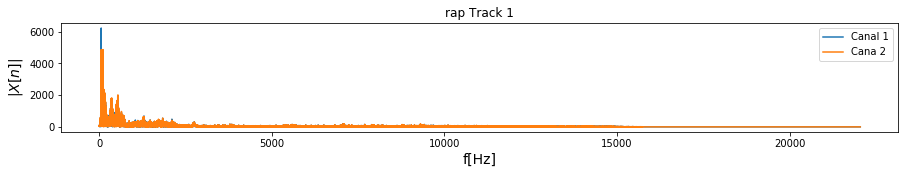

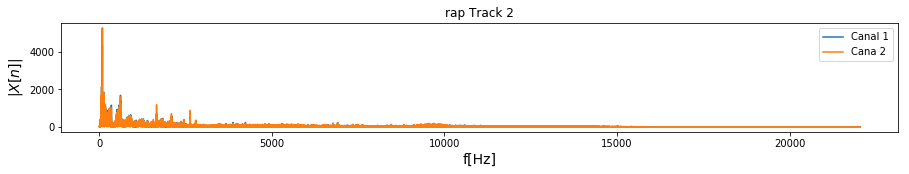

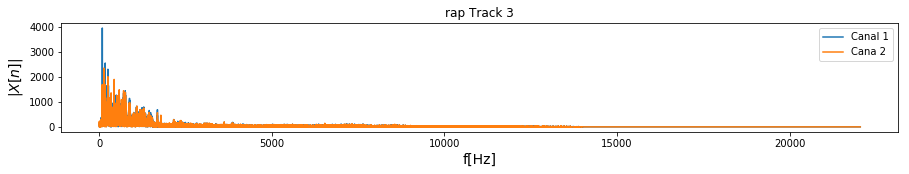

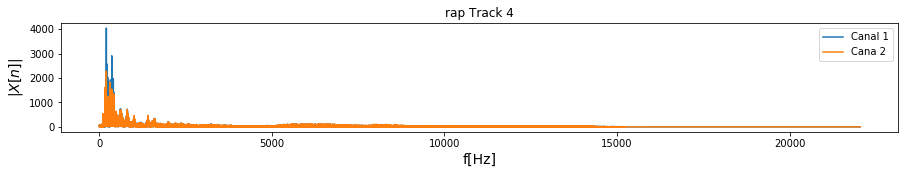

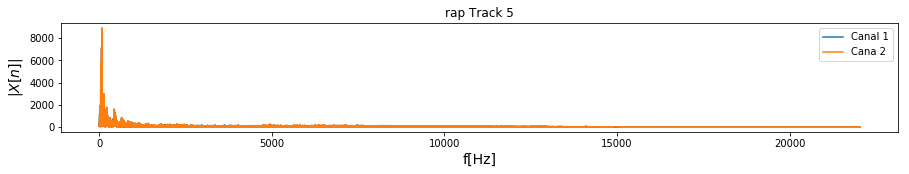

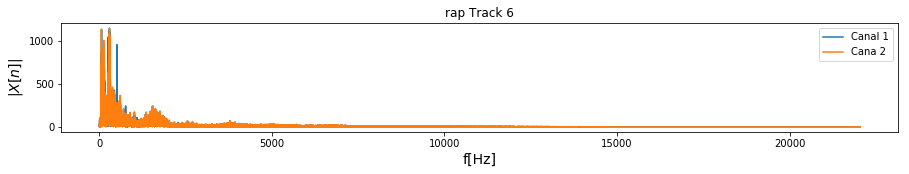

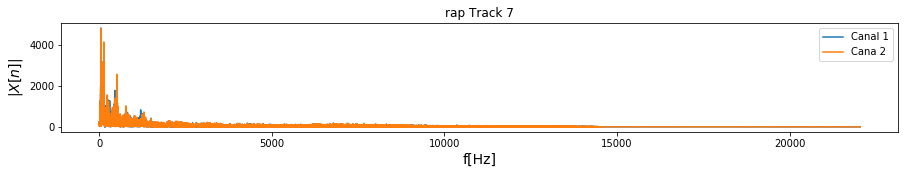

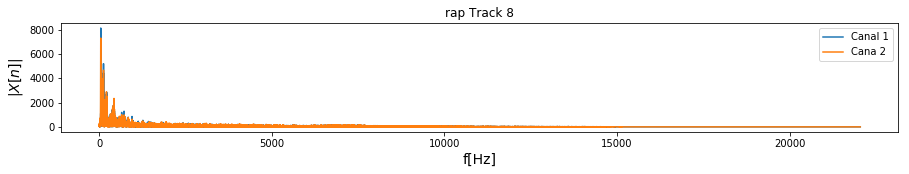

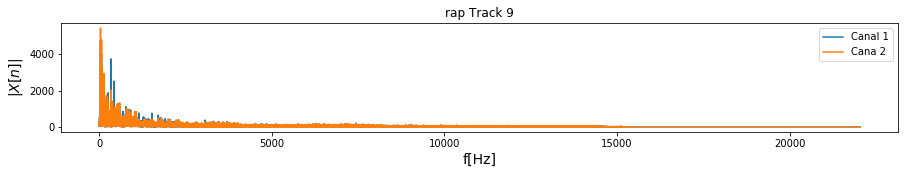

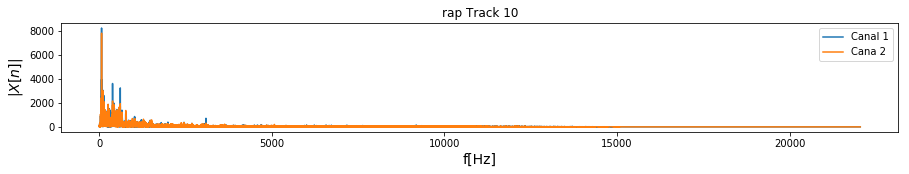

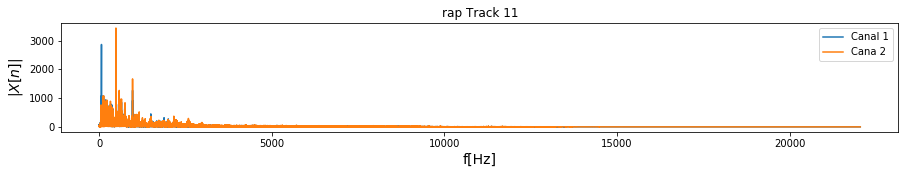

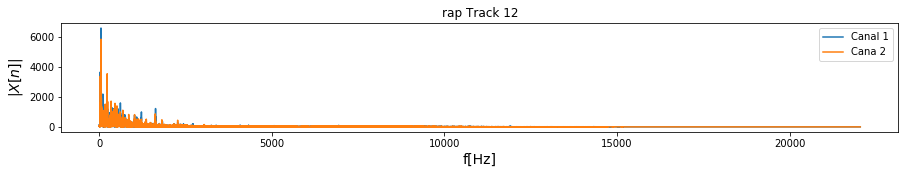

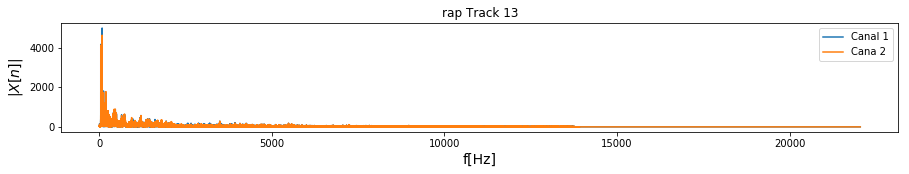

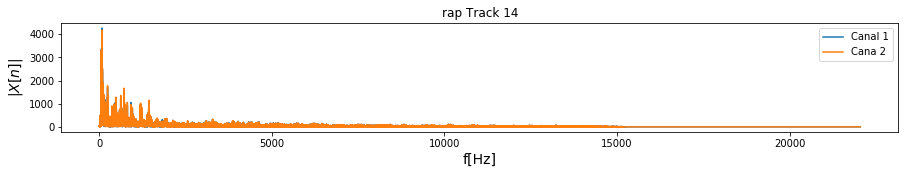

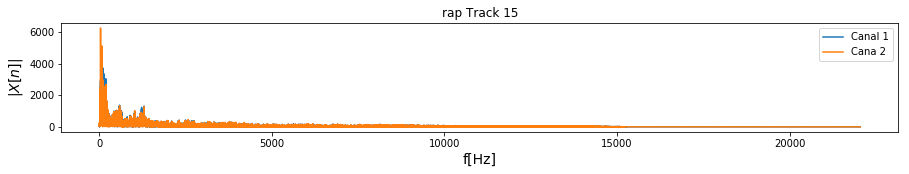

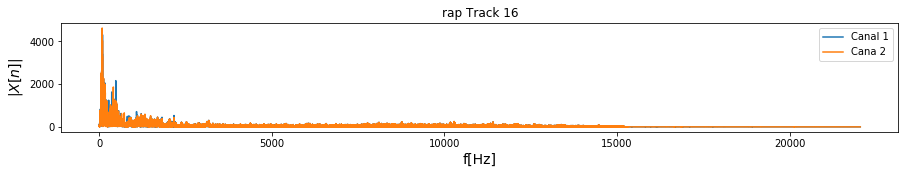

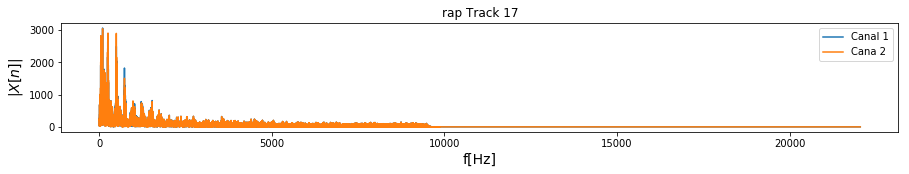

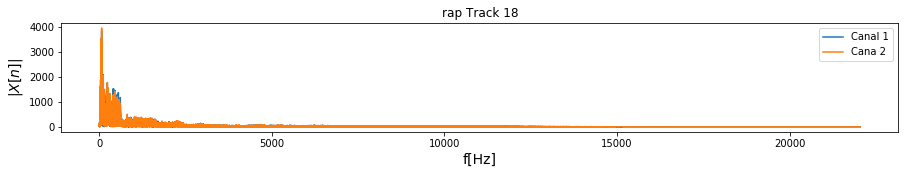

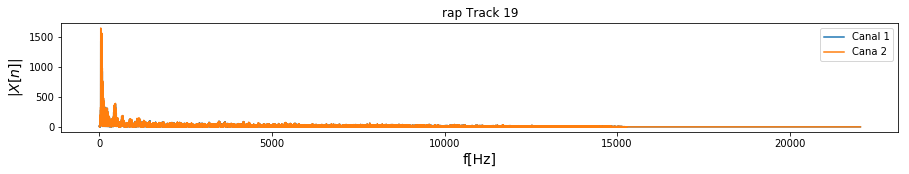

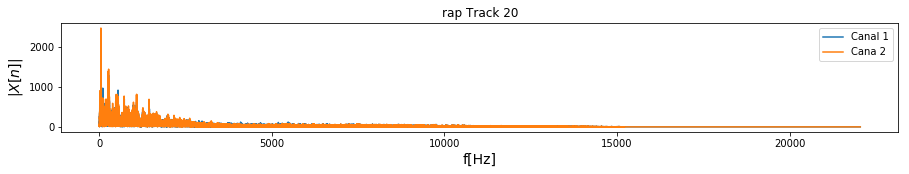

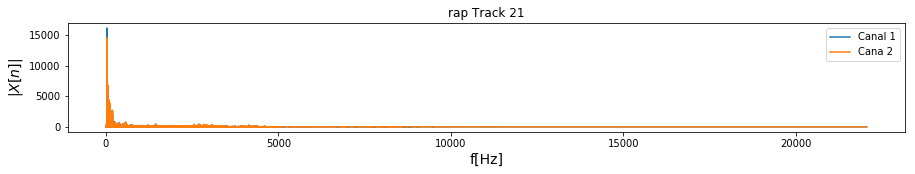

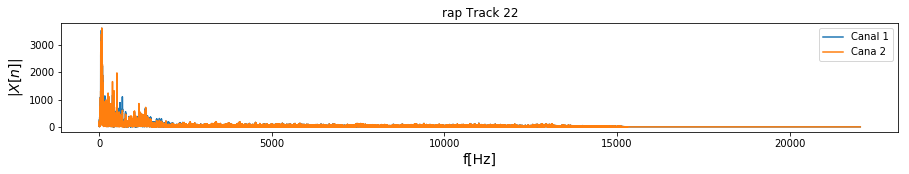

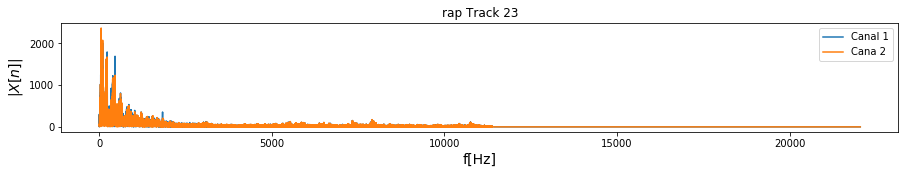

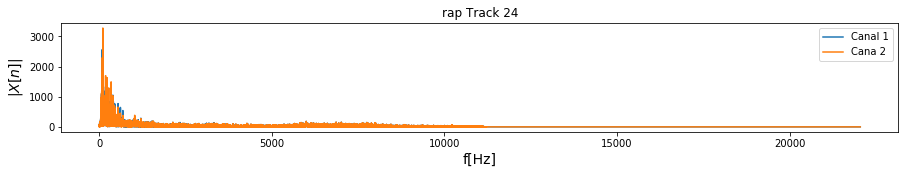

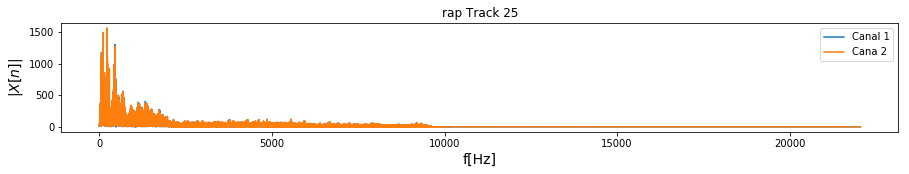

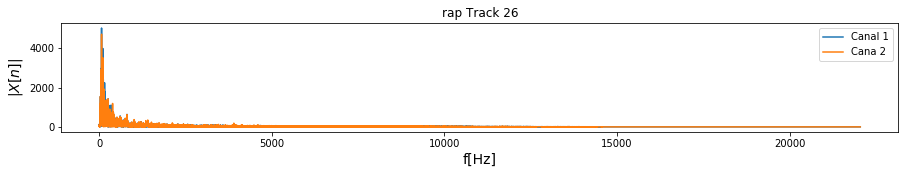

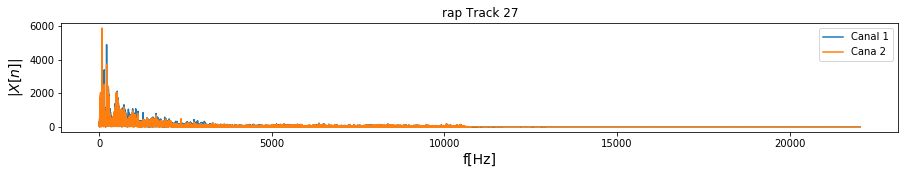

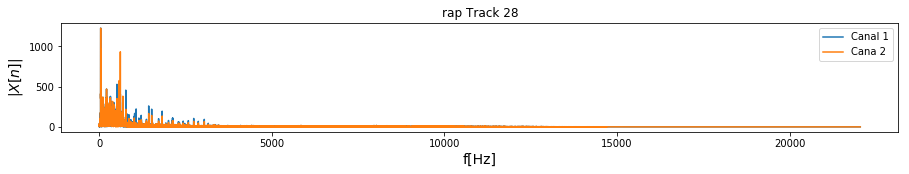

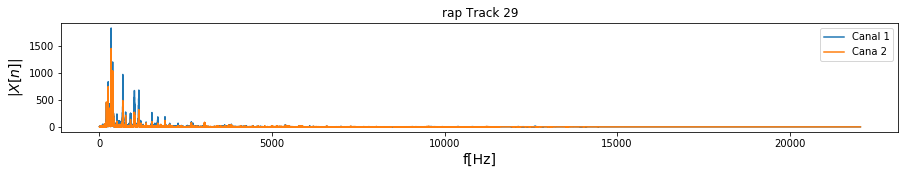

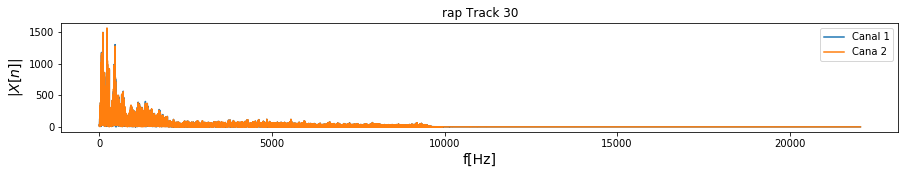

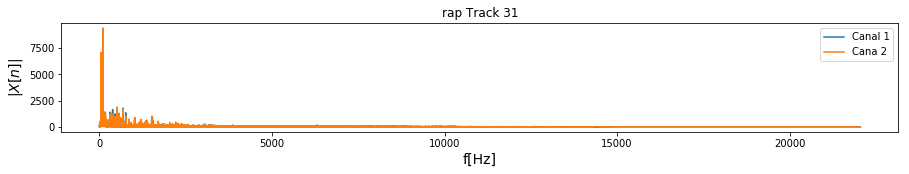

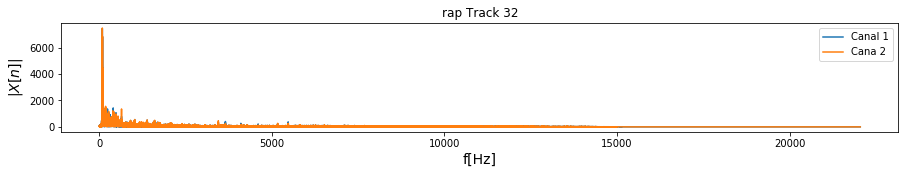

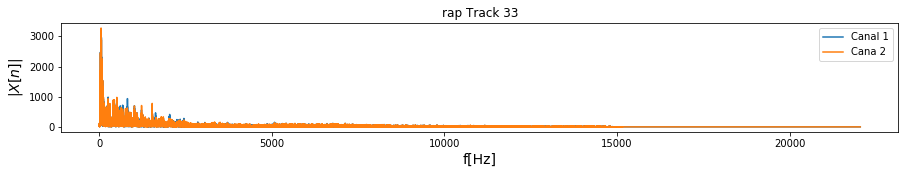

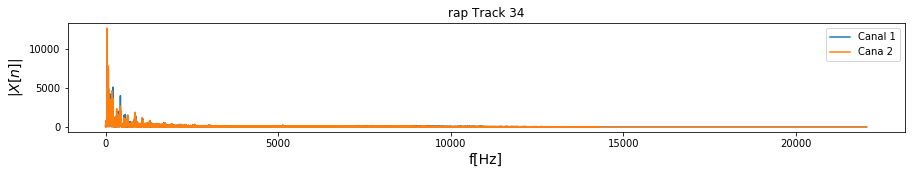

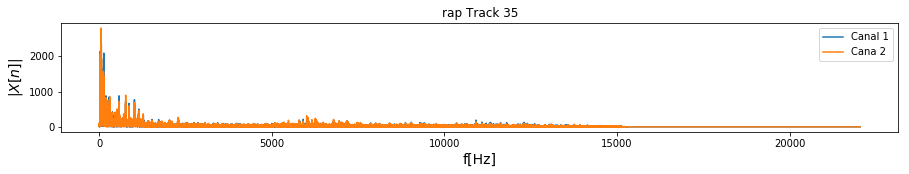

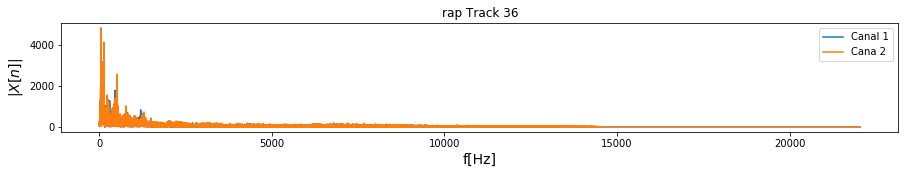

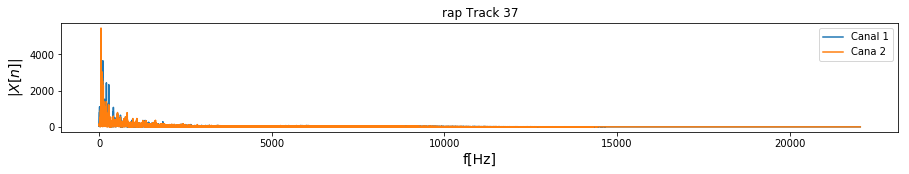

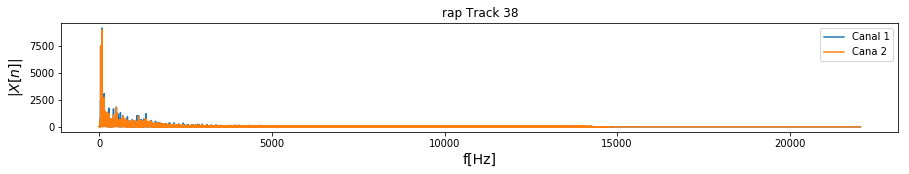

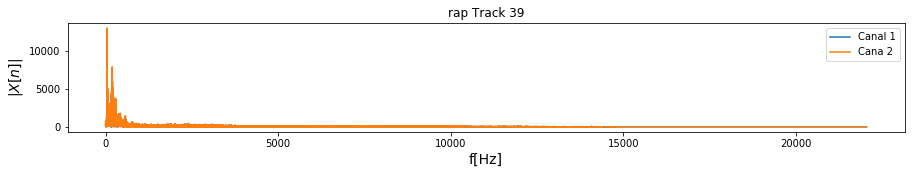

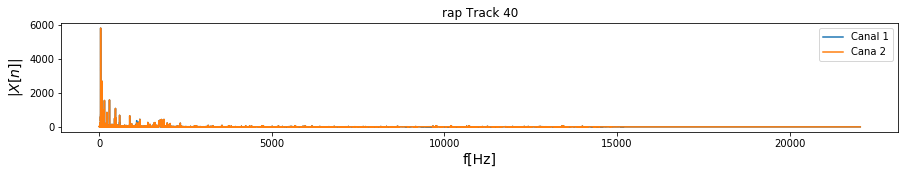

In [ ]:
for i in range (np.size(Xrapw, axis=2)):
    Xplotw=Xrapw[:,:,i]
    plt.figure(figsize=[15,2])
    plt.plot(f,abs(Xplotw))
    plt.title(genero[1] + ' Track ' + str(i+1))
    plt.legend(('Canal 1','Cana 2'))
    plt.xlabel(r'f[Hz]',fontsize = 14)
    plt.ylabel(r'$|X[n]|$',fontsize = 14)

plt.show()

## 3. ROCK

<audio src="base_de_datos/rock/Track_8.mp3" controls>Your browser does not support the audio element.</audio>
[](--)

In [ ]:
xrock=np.zeros([220500,2,40],order='C')

for i in range (40):
    x,a=sf.read('Dabatase/' + genero[2] + '/wavfiles/Track_' + str(i+1) + '.wav')
    xdat=x[int(ti*fs):int(tf*fs),:]
    xrock[:,:,i]=xdat
    
print('Numero de Datos: %i \n Canales: %i \n Numero de Canciones: %i'
      % (np.size(xrock, axis=0), np.size(xrock, axis=1), np.size(xrock, axis=2)))

Numero de Datos: 220500 
 Canales: 2 
 Numero de Canciones: 40


In [ ]:
Xrockw=np.fft.rfft(xrock,axis=0)
f=np.fft.rfftfreq(1*np.size(xrock,axis=0),1/fs)

G:\Nueva carpeta\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


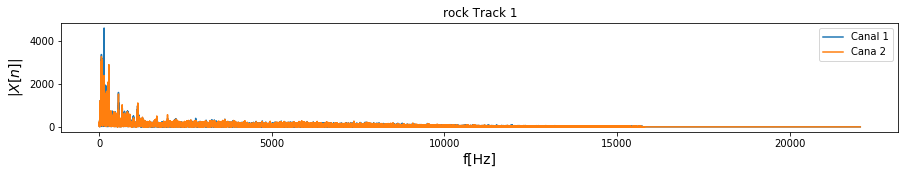

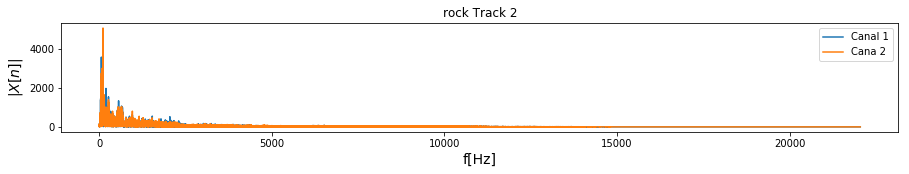

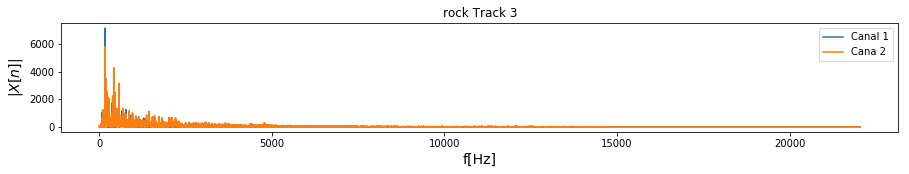

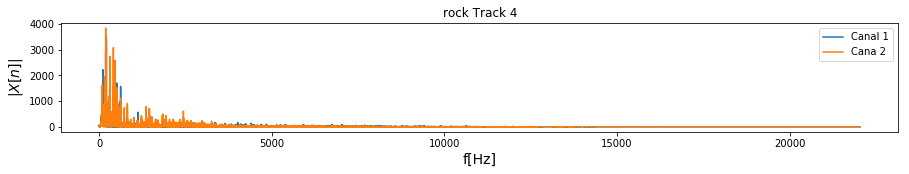

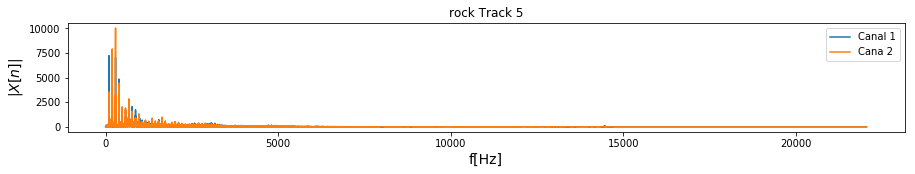

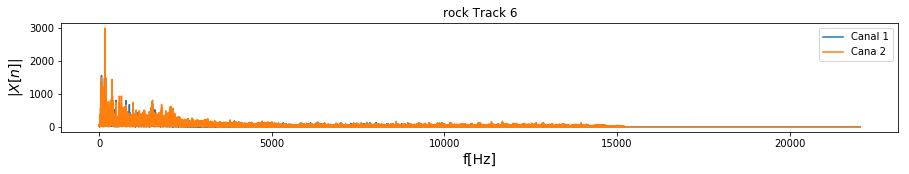

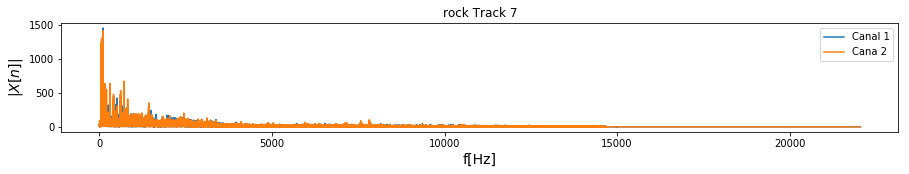

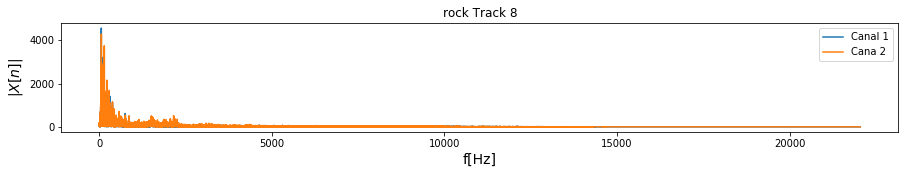

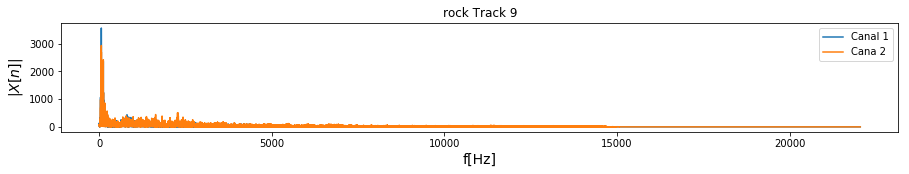

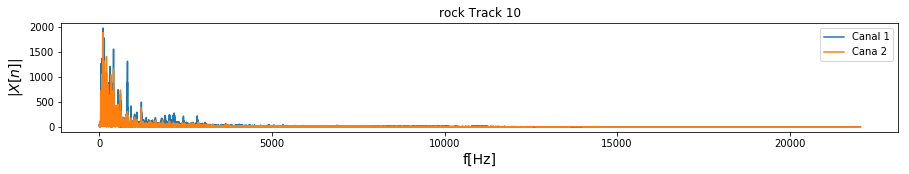

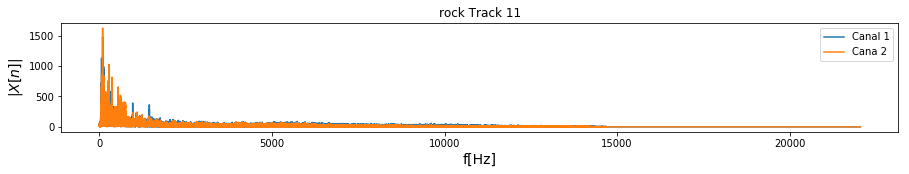

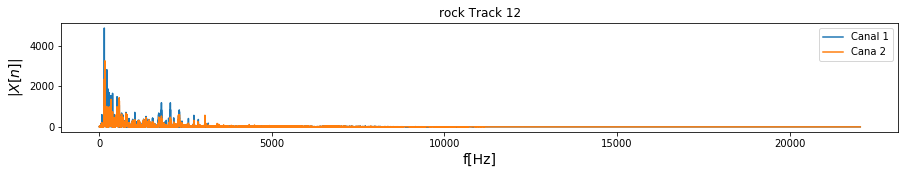

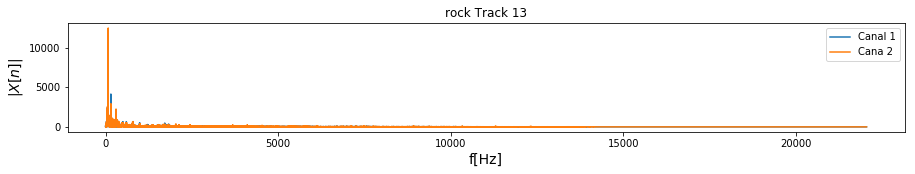

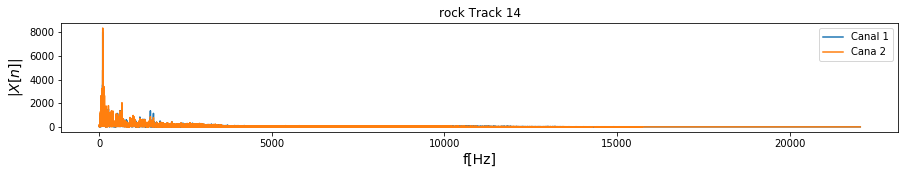

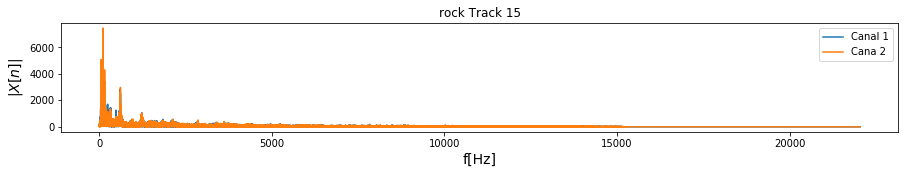

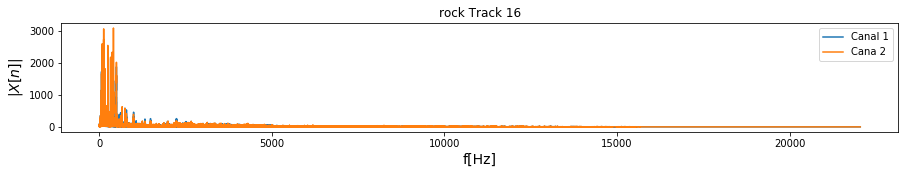

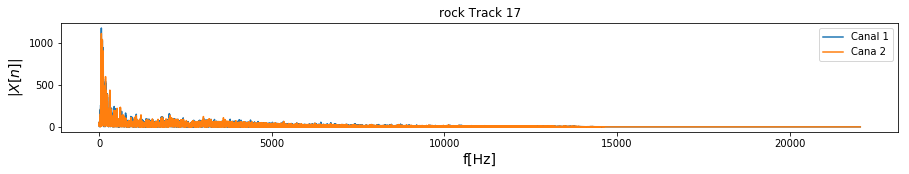

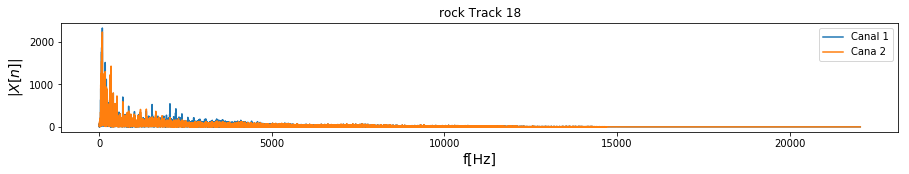

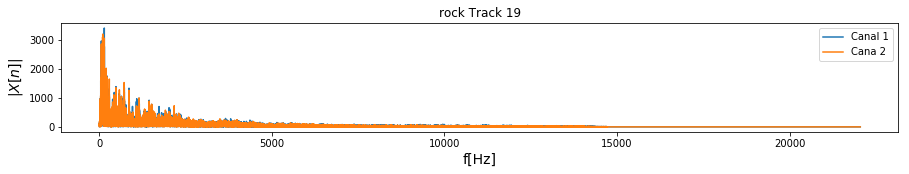

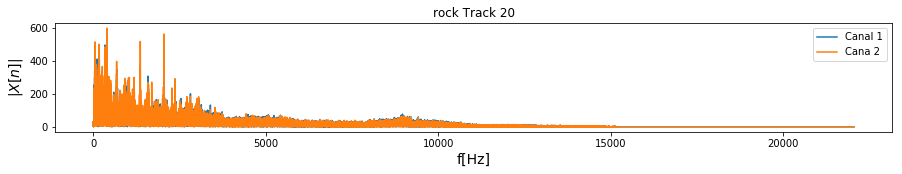

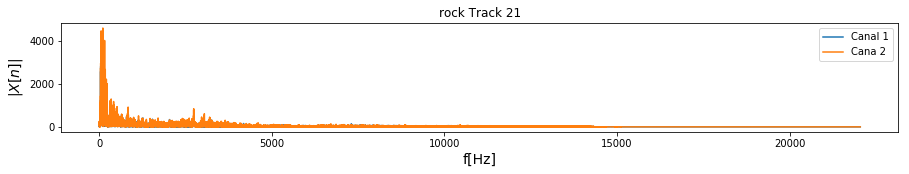

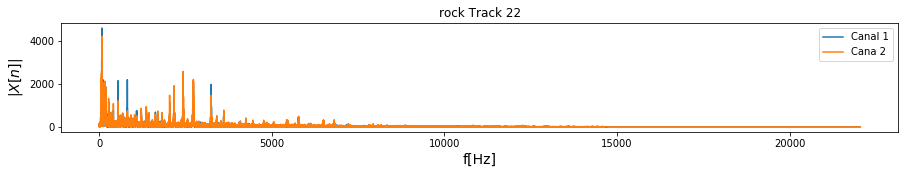

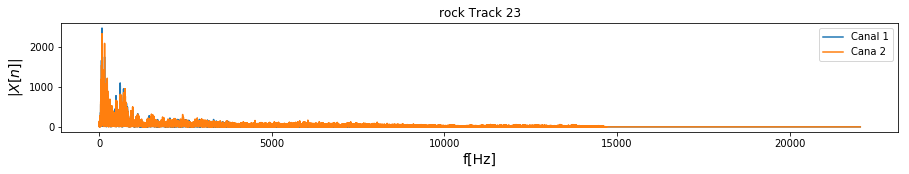

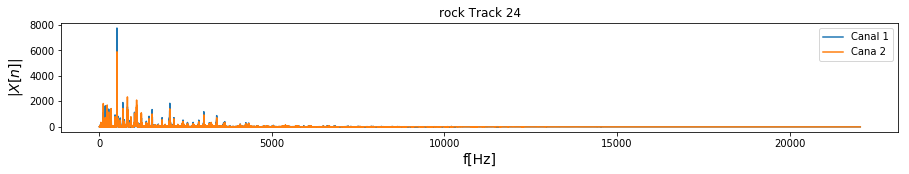

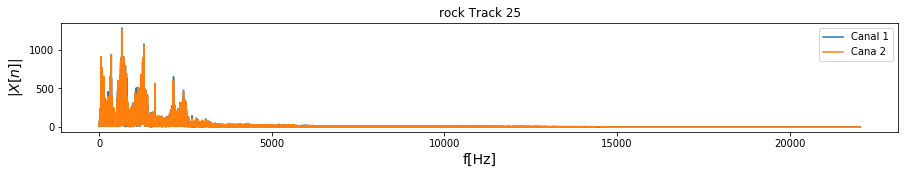

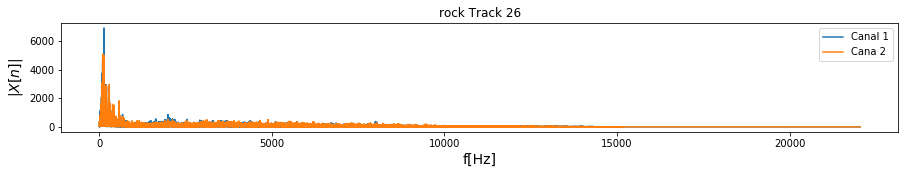

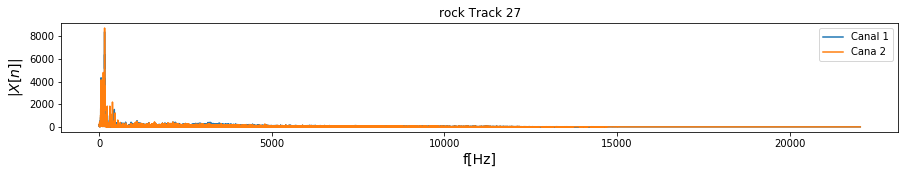

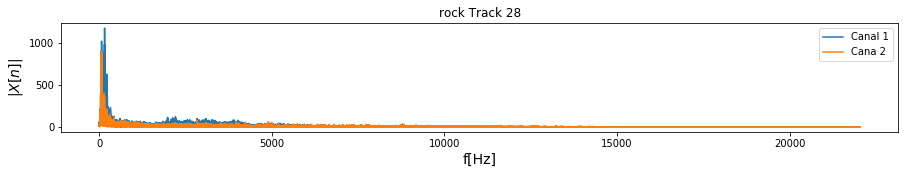

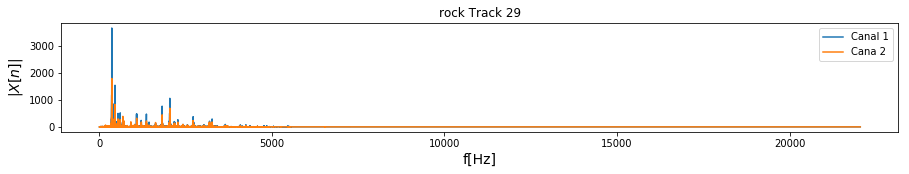

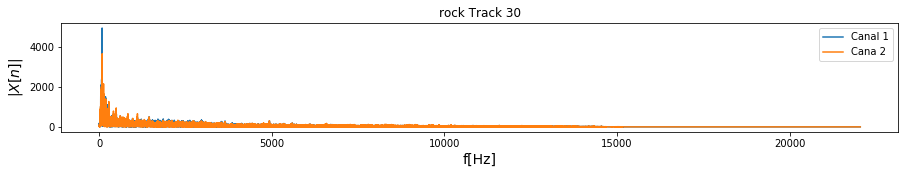

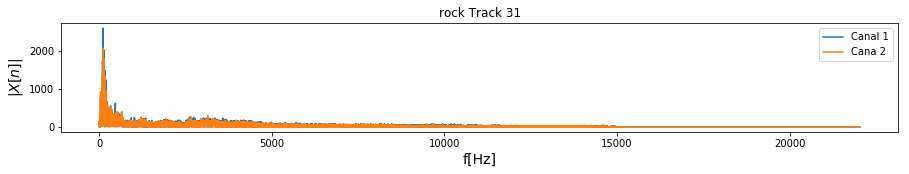

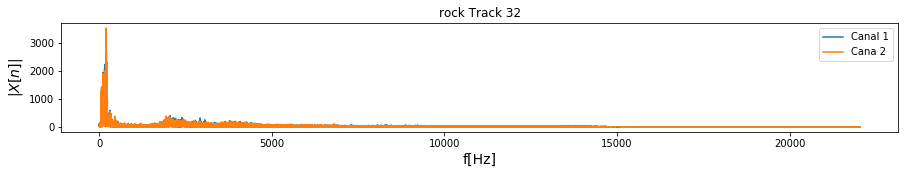

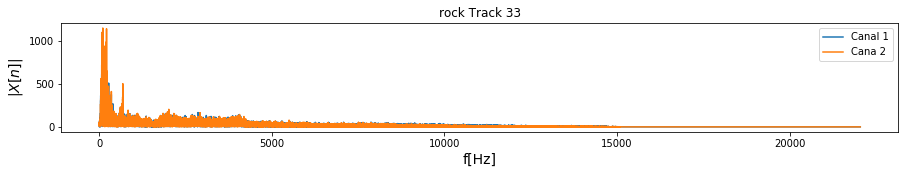

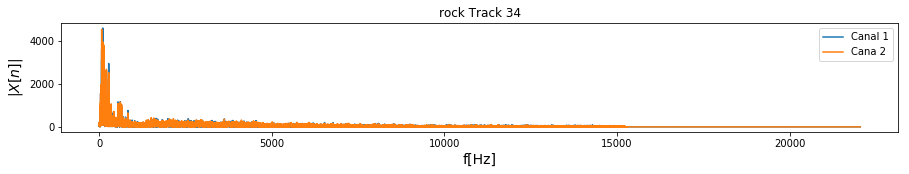

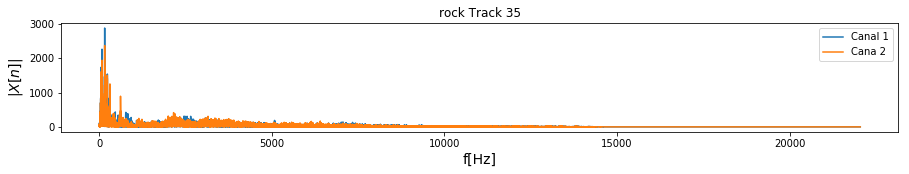

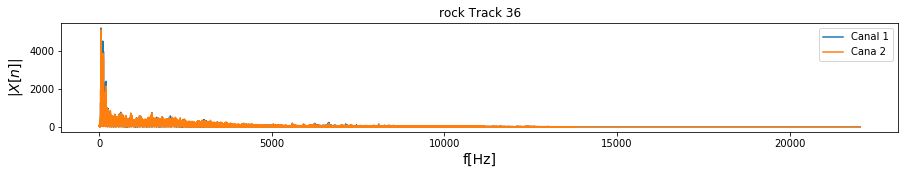

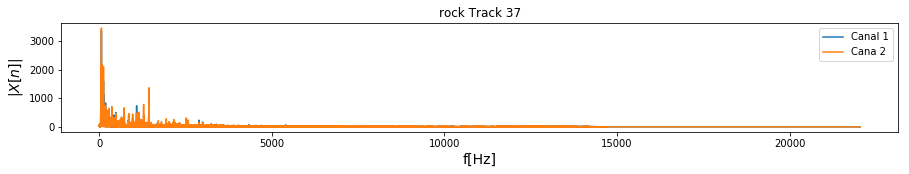

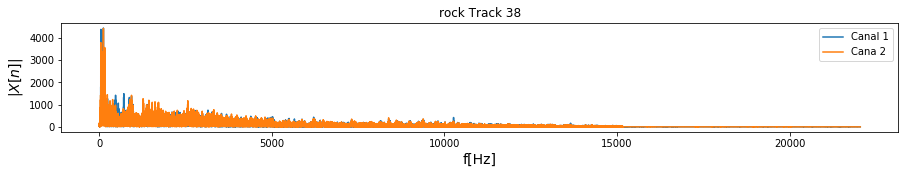

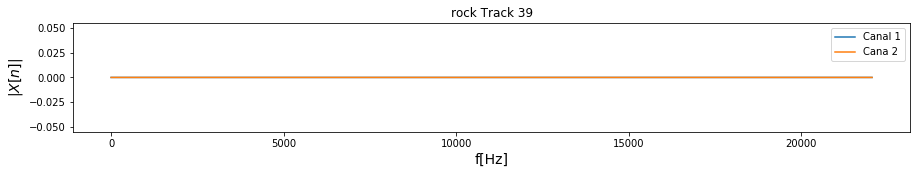

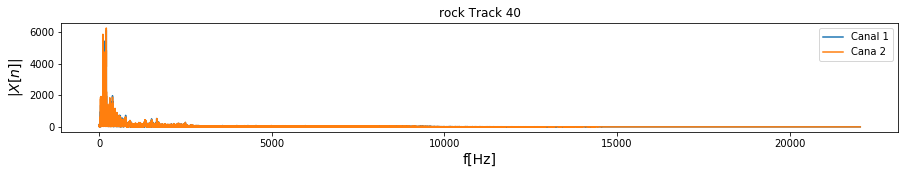

In [ ]:
for i in range (np.size(Xrockw, axis=2)):
    Xplotw=Xrockw[:,:,i]
    plt.figure(figsize=[15,2])
    plt.plot(f,abs(Xplotw))
    plt.title(genero[2] + ' Track ' + str(i+1))
    plt.legend(('Canal 1','Cana 2'))
    plt.xlabel(r'f[Hz]',fontsize = 14)
    plt.ylabel(r'$|X[n]|$',fontsize = 14)
    
plt.show()

## 4. SALSA

<audio src="base_de_datos/salsa/Track_20.mp3" controls>Your browser does not support the audio element.</audio>
[](--)

In [ ]:
xsalsa=np.zeros([220500,2,40],order='C')

for i in range (40):
    x,a=sf.read('Database/' + genero[3] + '/wavfiles/Track_' + str(i+1) + '.wav')
    xdat=x[int(ti*fs):int(tf*fs),:]
    xsalsa[:,:,i]=xdat
    
print('Numero de Datos: %i \n Canales: %i \n Numero de Canciones: %i'
      % (np.size(xsalsa, axis=0), np.size(xsalsa, axis=1), np.size(xsalsa, axis=2)))

Numero de Datos: 220500 
 Canales: 2 
 Numero de Canciones: 40


In [ ]:
Xsalsaw=np.fft.rfft(xsalsa,axis=0)
f=np.fft.rfftfreq(1*np.size(xsalsa,axis=0),1/fs)

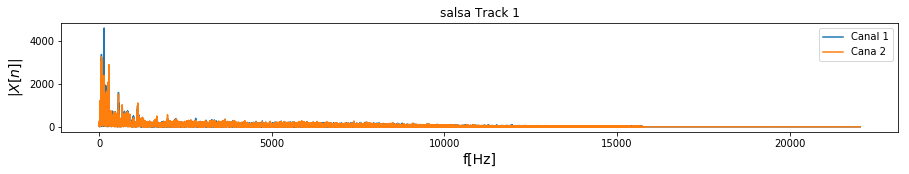

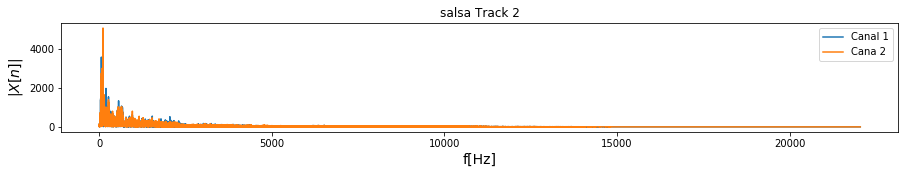

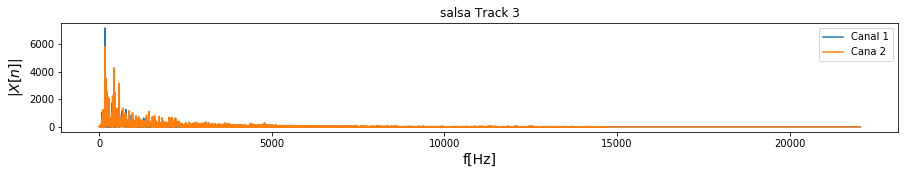

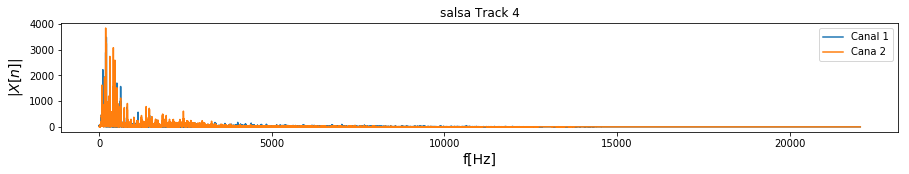

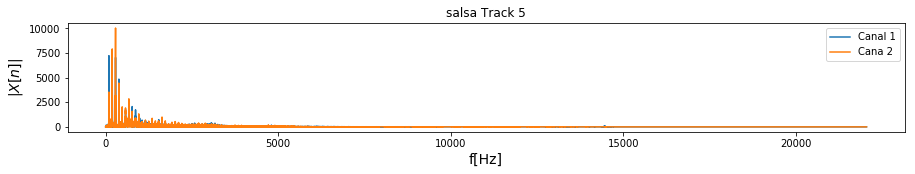

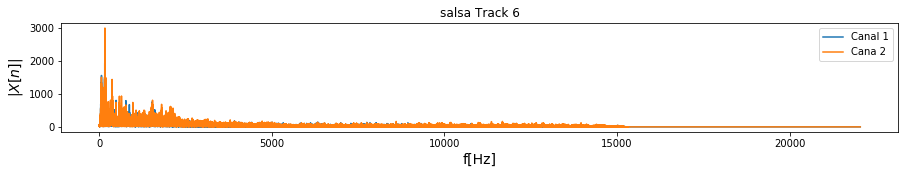

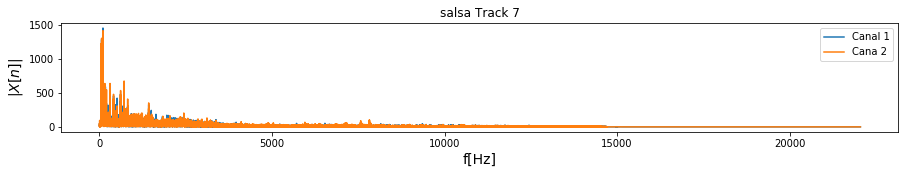

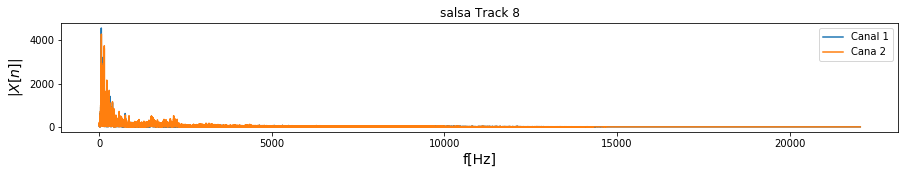

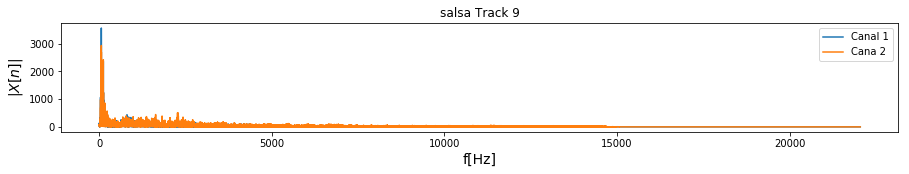

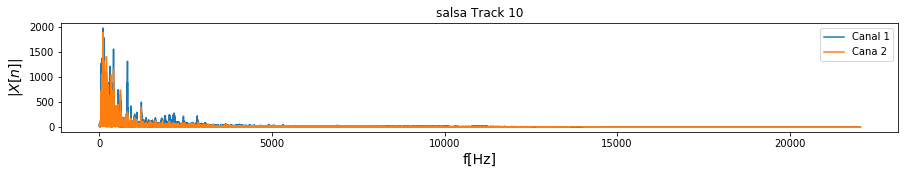

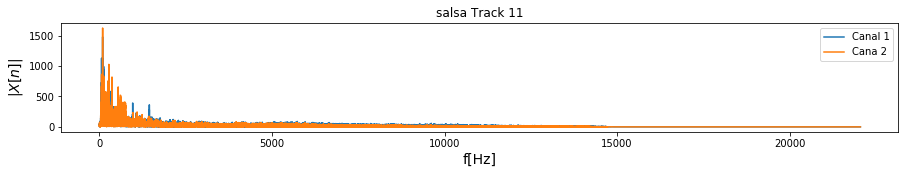

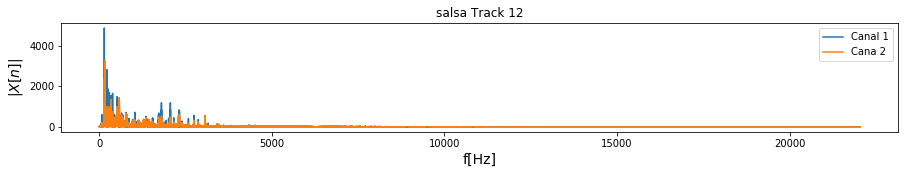

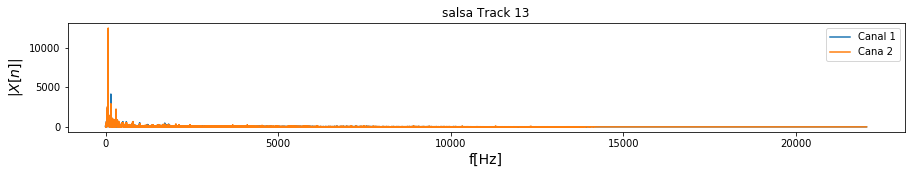

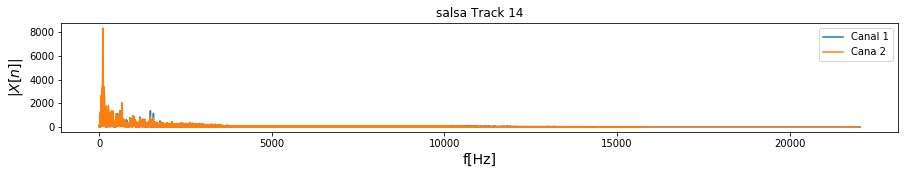

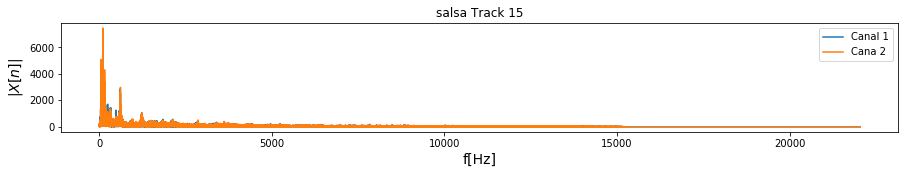

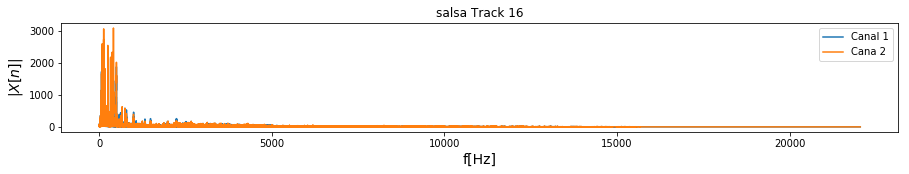

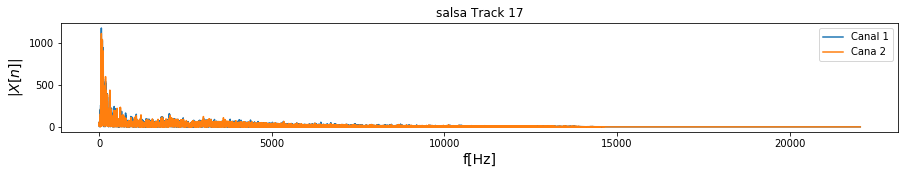

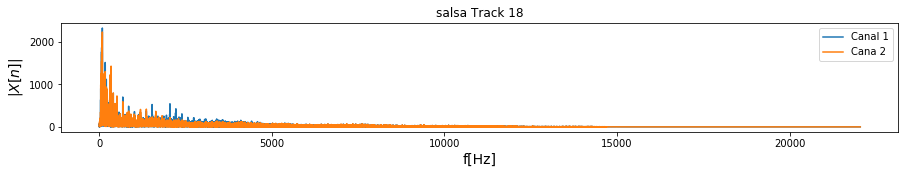

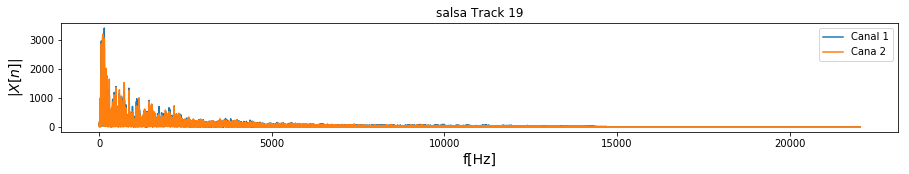

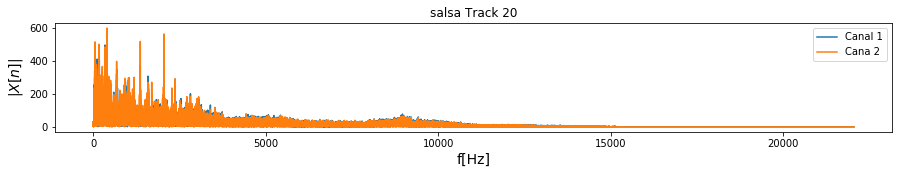

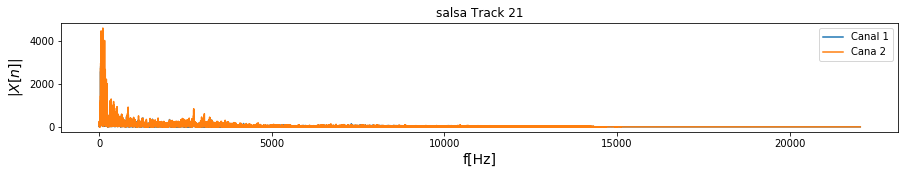

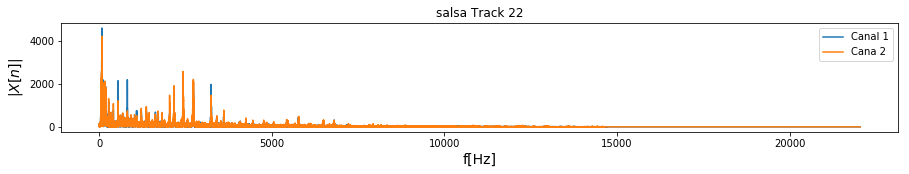

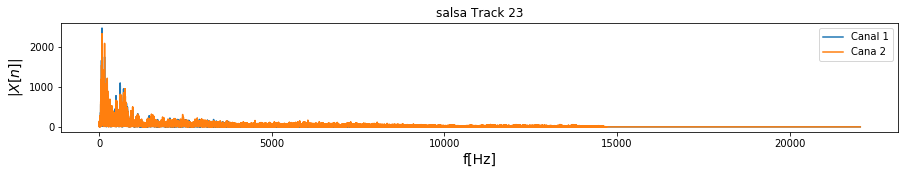

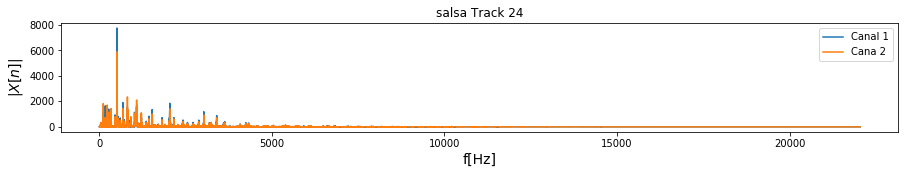

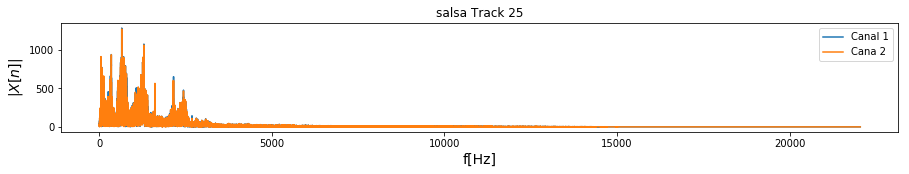

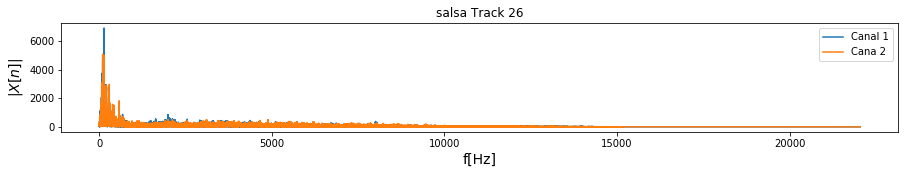

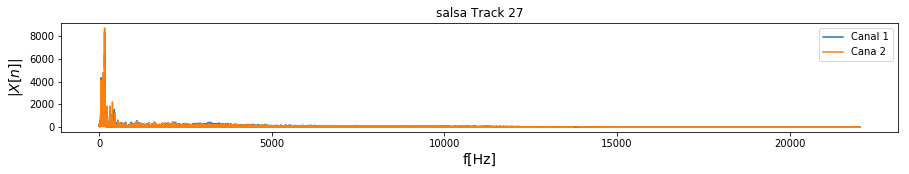

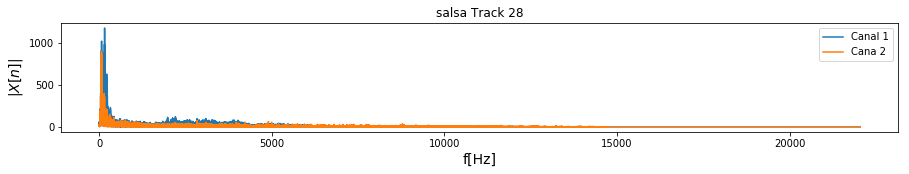

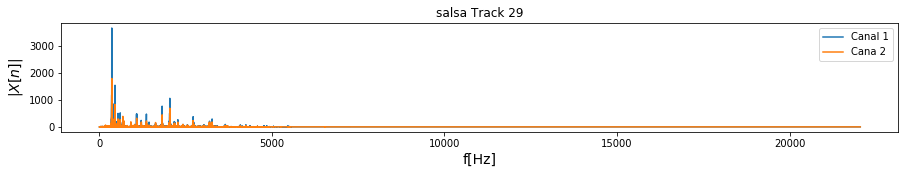

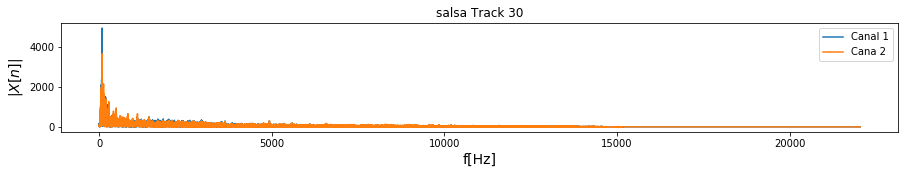

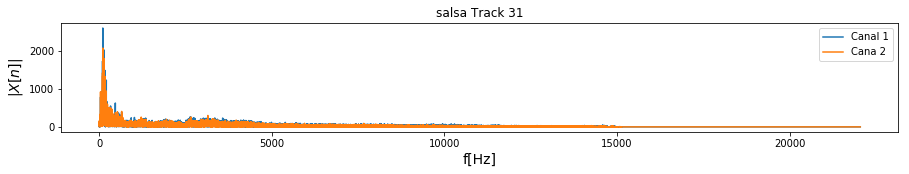

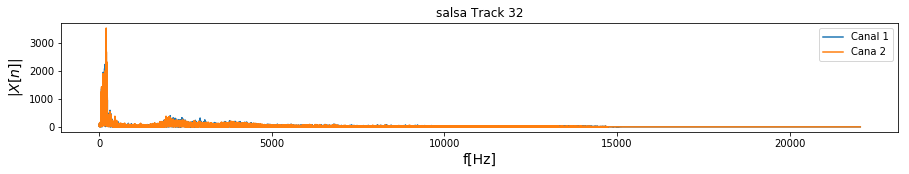

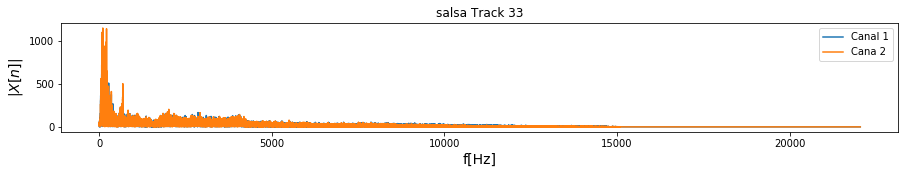

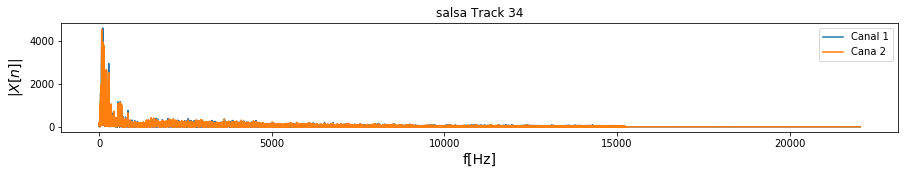

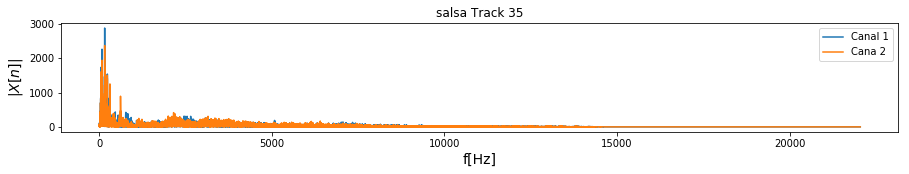

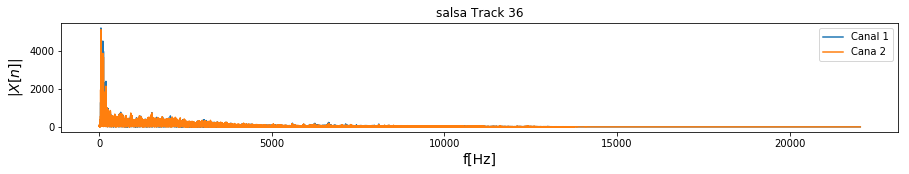

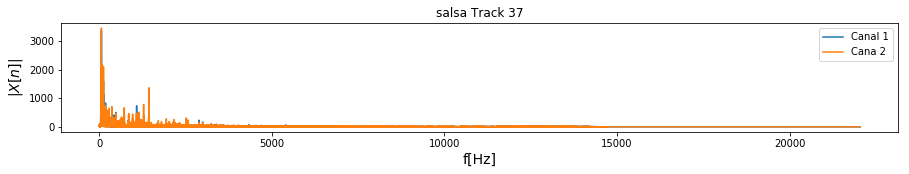

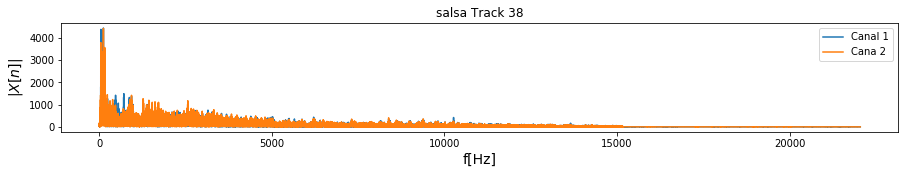

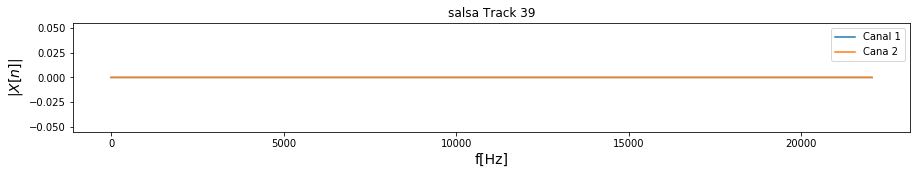

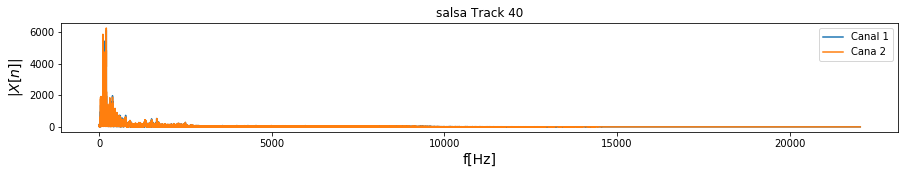

In [ ]:
for i in range (np.size(Xsalsaw, axis=2)):
    Xplotw=Xrockw[:,:,i]
    plt.figure(figsize=[15,2])
    plt.plot(f,abs(Xplotw))
    plt.title(genero[3] + ' Track ' + str(i+1))
    plt.legend(('Canal 1','Cana 2'))
    plt.xlabel(r'f[Hz]',fontsize = 14)
    plt.ylabel(r'$|X[n]|$',fontsize = 14)
    
plt.show()

### Creacion de la base de Datos

* Crear un archivo que contenga todos los datos de cada cancion y cada genero "Base de Datos"
* Exportar el archivo con la extencion .csv

In [ ]:
base_de_datos=np.zeros([160,10*fs])
for i in range(0,len(genero),1):
    for j in range(40):
        if (i==0): k=j
        if (i==1): k=j+40
        if (i==2): k=j+80
        if (i==3): k=j+120
        x,a=sf.read('Database/'+genero[i]+'/wavfiles/Track_'+str(j+1)+'.wav')
        xdati=x[int(ti*fs):int(tf*fs),0]
        xdatd=x[int(ti*fs):int(tf*fs),1]
        base_de_datos[k,:]=np.concatenate((xdati,xdatd),axis=None)

base_de_datos

array([[ 0.02706909,  0.0223999 ,  0.01889038, ..., -0.11431885,
        -0.14080811, -0.16220093],
       [-0.03610229,  0.0730896 ,  0.10974121, ..., -0.92718506,
        -0.83477783, -0.82818604],
       [-0.05166626, -0.0567627 , -0.05090332, ..., -0.06518555,
        -0.00683594,  0.02252197],
       ...,
       [-0.05831909, -0.05221558, -0.0579834 , ..., -0.10147095,
        -0.1086731 ,  0.04403687],
       [ 0.22723389,  0.18188477,  0.14105225, ...,  0.02258301,
         0.00695801, -0.00479126],
       [ 0.10629272,  0.09710693,  0.09902954, ...,  0.06069946,
         0.05117798,  0.03878784]])

In [ ]:
base_de_datos.shape

(160, 441000)

### Base de Datos en Fourier

In [ ]:
base_de_datos_fourier=abs(np.fft.rfft(base_de_datos,axis=1))
base_de_datos_fourier

array([[4.03746948e+01, 2.77524444e+01, 3.18113252e+01, ...,
        3.42398404e-01, 1.42259046e-01, 3.38745117e-01],
       [1.43839722e+01, 1.64927360e+01, 5.34671860e+01, ...,
        7.02245976e-01, 1.90690599e-01, 9.45251465e-01],
       [4.87655640e+00, 5.64723837e+01, 5.51449289e+01, ...,
        2.15242290e-02, 6.93007382e-02, 3.37829590e-02],
       ...,
       [3.31831055e+01, 3.15486393e+01, 1.80222189e+02, ...,
        1.87701796e-01, 2.30094099e-02, 1.71020508e-01],
       [2.62348022e+01, 3.12029351e+01, 1.06093205e+02, ...,
        1.39003307e-01, 2.31072724e-01, 7.74536133e-02],
       [5.11854858e+01, 1.09398546e+01, 4.47208242e+01, ...,
        3.71527164e-02, 4.63504782e-02, 3.97338867e-02]])

In [ ]:
base_de_datos_fourier.shape

(160, 220501)

* Creacion de la matriz normalizada equivalente a la base de datos completa

In [ ]:
media=np.mean(base_de_datos_fourier, axis=0)
desviacion=np.std(base_de_datos_fourier, axis=0)
base_normalizada=np.zeros([np.size(base_de_datos_fourier,axis=0),np.size(base_de_datos_fourier,axis=1)])
print('Tamaño matriz: [%i,%i] \ndatos media: %i \ndatos desviacion: %i'
    %(np.size(base_normalizada,axis=0),np.size(base_normalizada,axis=1),len(media),len(desviacion)))

Tamaño matriz: [160,220501] 
datos media: 220501 
datos desviacion: 220501


In [ ]:
for i in range(np.size(base_de_datos_fourier, axis=0)):
    for j in range(np.size(base_de_datos_fourier, axis=1)):
        base_normalizada[i,j]=(base_de_datos_fourier[i,j]-media[j])/desviacion[j]

In [ ]:
gen=np.zeros(np.size(base_normalizada,axis=0))
for i in range(len(genero)):
    if i==1: gen[40:80]=1
    if i==2: gen[80:120]=2
    if i==1: gen[120:160]=3
gen

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.])

In [ ]:
base_normalizada=np.c_[base_normalizada,gen]

In [ ]:
pd.DataFrame(base_normalizada).to_csv('Std_Database.csv',index=None)

In [ ]:
pd.read_csv('Std_Database.csv')

,0,1,2,3,4,5,6,7,8,9,...,220492,220493,220494,220495,220496,220497,220498,220499,220500,220501
0,-0.271591,-0.257852,-0.601099,-0.393528,-0.490207,-0.121349,-0.603025,-0.506022,-0.824204,-0.301474,...,0.381185,0.258827,0.440843,0.274324,0.356869,0.138116,0.277169,0.357673,0.383062,0.0
1,-0.359955,-0.360508,-0.390966,-0.216388,-0.168028,-0.174453,-0.524984,-0.606622,-0.500404,-0.220602,...,0.912672,0.620830,-0.212668,0.923722,0.502458,-0.307661,1.588844,0.732426,2.790313,0.0
2,-0.392279,0.003990,-0.374686,0.221957,-0.394868,-0.136243,-0.459618,0.214104,-0.332732,0.014854,...,-0.962412,-0.426172,-0.907782,-0.234195,-0.888437,-0.366072,-0.892444,-0.206863,-0.827346,0.0
3,-0.210750,0.038538,1.604400,0.004307,1.330220,-0.044242,2.439679,0.281693,-0.385535,0.225170,...,2.907320,1.930728,3.546969,3.332242,0.947627,3.818369,2.198510,5.701521,1.386346,0.0
4,-0.251444,-0.322512,-0.503286,-0.210980,-0.439383,-0.142068,-0.674408,-0.599727,-0.664390,-0.323864,...,-0.652629,-0.610193,-0.666635,-0.553340,-0.644647,-0.443543,-0.684020,-0.522784,-0.663100,0.0
5,-0.406670,-0.099793,-0.514909,0.333351,-0.387418,0.037750,-0.394189,-0.114083,-0.396815,-0.352825,...,-0.243441,-0.361413,-0.228733,-0.299026,-0.265054,-0.258571,-0.312413,-0.304268,-0.213845,0.0
6,1.575365,0.036892,1.941161,-0.362871,2.689010,-0.009695,1.924167,-0.465400,2.804309,0.017130,...,1.729359,1.389436,2.564248,0.335811,0.508245,2.151209,2.050211,-0.178496,1.502384,0.0
7,2.478312,0.052078,-0.152878,-0.351155,1.841744,-0.015875,2.802046,-0.453519,0.050792,-0.001661,...,1.347122,2.178347,0.951057,1.073074,3.063779,2.426180,3.041956,0.338000,1.596862,0.0
8,-0.229184,0.262215,-0.018932,-0.058896,0.097268,-0.021680,0.365949,0.335000,0.259449,0.025271,...,-0.751606,-0.310953,-0.778159,-0.214702,-0.739598,-0.241374,-0.718408,-0.283098,-0.672306,0.0
9,-0.238473,0.423323,-0.483011,-0.162708,-0.241639,-0.013258,0.297934,-0.567444,-0.705322,0.057609,...,0.585138,0.759968,0.553731,1.104894,0.483490,0.448958,0.479122,1.035751,0.460704,0.0


## Principal Component Analisis (PCA)

In [ ]:
pca = PCA(n_components=100)
pca.fit(base_normalizada)  
PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[0.30404776 0.10580783 0.06033179 0.0410125  0.03113956 0.0272365
 0.0225901  0.01800545 0.01508427 0.0128475  0.01168138 0.01114198
 0.01051273 0.00985405 0.00947336 0.00915054 0.00872438 0.00843553
 0.0084004  0.0079041  0.00733183 0.00726946 0.00689927 0.00682114
 0.00670146 0.00627371 0.00618052 0.00582639 0.00569672 0.0054727
 0.00519917 0.00516796 0.00495434 0.00465359 0.00464091 0.00439911
 0.00432209 0.00420164 0.00413228 0.00404583 0.00395437 0.00382187
 0.00376408 0.00351416 0.00337029 0.00325375 0.00317836 0.00312239
 0.00308235 0.00300531 0.00295157 0.00289343 0.00280509 0.00276795
 0.00268147 0.00266549 0.00254986 0.00246178 0.002417   0.00236008
 0.00232803 0.00230523 0.0022302  0.00221827 0.00220554 0.00215584
 0.00212502 0.00208089 0.00203577 0.00198507 0.00197862 0.00194703
 0.00194184 0.0019087  0.00185375 0.00181919 0.00175972 0.00173023
 0.00169656 0.00167384 0.00165611 0.00161948 0.00158089 0.00151784
 0.00150668 0.00143346 0.00142575 0.00139628 0.00135315 0.001335

In [ ]:
Z= pca.transform(base_normalizada) 
Z.shape

(160, 100)

In [ ]:
gen=np.zeros(np.size(Z,axis=0))
for i in range(len(genero)):
    if i==1: gen[40:80]=1
    if i==2: gen[80:120]=2
    if i==1: gen[120:160]=3

In [ ]:
gen

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3.])

In [ ]:
pd.DataFrame(Z).to_csv('PCA.csv',index=None)

In [ ]:
pd.read_csv('PCA.csv')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-99.983028,78.226315,19.293382,9.597092,98.367913,55.731091,7.115890,-1.077783,-8.610785,-0.865060,...,33.654068,-36.194883,39.953553,-20.444599,3.905908,6.744187,30.848344,-46.286846,-18.532693,11.445653
1,535.464251,-150.809253,-11.399575,14.792068,135.995290,-152.486297,-162.767573,25.087477,106.868111,12.951286,...,-0.397766,1.483564,1.094575,0.841485,1.403695,-3.902993,1.043219,-2.366841,-0.560020,-3.343508
2,-48.325425,-107.549815,15.924039,-35.985594,-78.558934,2.043591,-27.983188,17.804437,-19.563278,-30.984305,...,-3.582256,-14.126967,18.543464,-12.471322,-4.769348,1.059232,-3.633625,-1.390375,-1.634711,1.954834
3,787.038406,-180.435389,19.966220,91.548316,-3.798200,348.586663,-108.518292,-226.753323,-44.884461,386.289869,...,-2.485587,2.753370,-2.711994,0.206551,0.384272,0.023645,0.898415,1.615904,-1.866046,-2.574991
4,-264.981028,33.373036,31.100355,-1.692548,10.398985,26.604012,-5.528079,-20.074992,34.806403,19.132603,...,-2.758910,3.336817,-4.771146,-4.868889,-0.016741,-0.764709,-4.188769,2.108703,5.048904,-4.337081
5,186.134173,-240.643771,33.822626,-105.280755,-52.879131,-74.191973,42.815716,163.535617,-178.703245,49.139088,...,-4.450118,-1.747265,-0.892162,2.113128,2.113914,0.697027,-2.045114,1.607095,0.192687,-3.203283
6,419.978973,-118.891572,79.828209,96.004599,228.063305,167.774641,-134.785130,39.662915,33.332579,-212.025196,...,0.200356,0.994707,-2.429418,4.056916,1.919706,-8.767411,0.079911,-2.976349,2.860967,-5.541870
7,508.506506,-19.677293,23.885046,139.892205,351.246104,109.097348,-118.637354,74.443709,34.159498,-191.789514,...,0.072955,1.035702,3.400992,-2.673843,-0.346060,6.187036,1.151351,2.780543,-3.852018,3.068066
8,-42.453728,-92.236561,10.319775,-8.529315,-66.442935,22.856817,-27.036508,8.863476,-4.013186,-12.453421,...,-10.033623,-0.153737,3.172371,-4.195366,-0.207270,8.896455,4.344912,-6.373833,2.827899,-7.374726
9,-60.765659,112.693556,18.609218,-35.866415,111.521361,62.800127,14.756978,-24.068319,-6.683959,-5.557615,...,10.745073,-36.998577,36.449317,-16.171851,11.706851,-4.811470,10.245805,-43.376928,-4.931249,19.175462


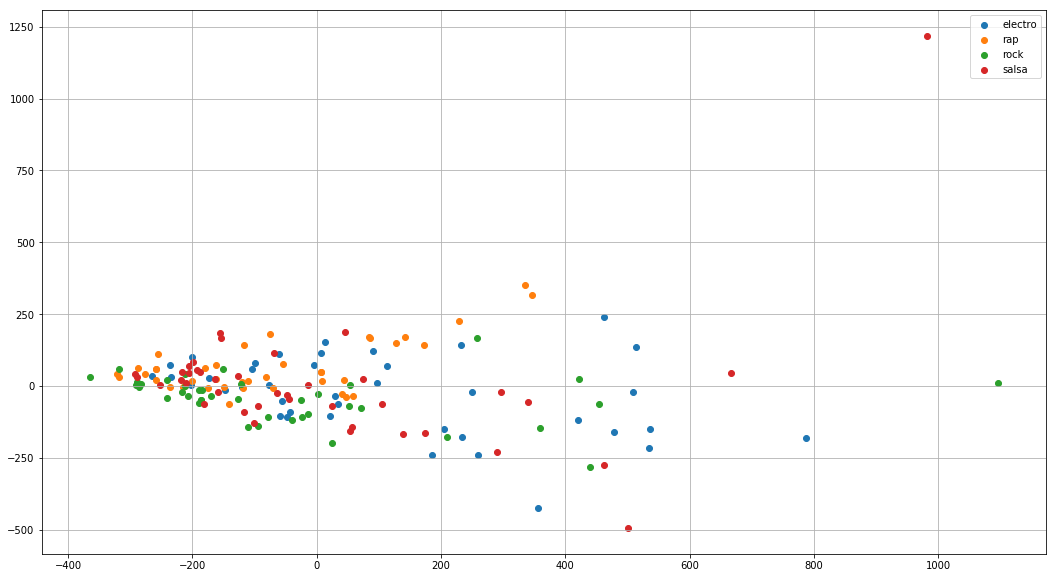

In [ ]:
plt.figure(figsize=[18,10])
plt.scatter(Z[0:40,0],Z[0:40,1])
plt.scatter(Z[40:80,0],Z[40:80,1])
plt.scatter(Z[80:120,0],Z[80:120,1])
plt.scatter(Z[120:160,0],Z[120:160,1])
plt.legend((genero[0],genero[1],genero[2],genero[3]))
plt.grid()

In [ ]:
bayes = GaussianNB()
bayes.fit(Z, gen)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
[nombre_in,nombre_out] = ['Salsa.mp3','Salsa.wav']
os.system("ffmpeg -i " + nombre_in +" "+ nombre_out)
xdat,a=sf.read('Salsa.wav')
Xsongw=abs(np.fft.rfft(xdat[int(ti*fs):int(tf*fs),0]))
Xsongwd=abs(np.fft.rfft(xdat[int(ti*fs):int(tf*fs),1]))
Xsongw=np.concatenate((Xsongwi,Xsongwd),axis=None)